In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
import datasets
import functools
from wordcloud import WordCloud

#NLTK
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#SKLearn
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

#PyTorch
import torch
import torchtext
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.utils.data import Dataset, random_split, DataLoader
import torch.optim as optim
import torch.nn.functional as F
from torchtext import data

#Progress bar
import pickle as pkl
from tqdm.notebook import tqdm

#Initialization
torch.manual_seed(42)
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Devansh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Q1

In [2]:
#Import Datasets
df_train = pd.read_csv("MDDA/train.csv")
df_test = pd.read_csv("MDDA/test.csv")

In [3]:
train_count = df_train['act'].value_counts()
test_count = df_test['act'].value_counts()

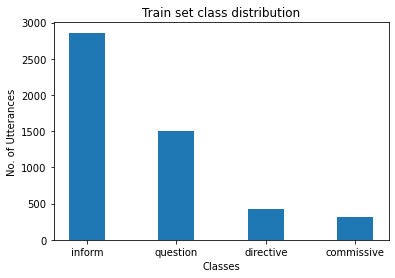

<Figure size 432x288 with 0 Axes>

In [4]:
classes = ["inform","question","directive","commissive" ]
plt.bar(classes , train_count,width = 0.4)
plt.xlabel("Classes")
plt.ylabel("No. of Utterances")
plt.title("Train set class distribution")
plt.show()
plt.savefig('Train_classes')

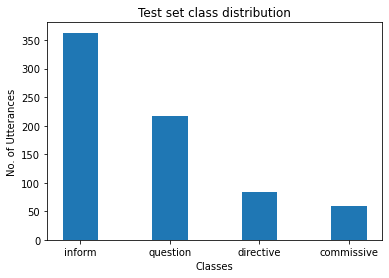

<Figure size 432x288 with 0 Axes>

In [5]:
classes = ["inform","question","directive","commissive" ]
plt.bar(classes , test_count,width = 0.4)
plt.xlabel("Classes")
plt.ylabel("No. of Utterances")
plt.title("Test set class distribution")
plt.show()
plt.savefig('Test_classes')

In [6]:
avg_len_char_train = 0
for i in range(len(df_train)):
    avg_len_char_train += len(df_train['utterance'][i])
avg_len_char_train /= len(df_train)
avg_len_char_train

62.108840864440076

In [7]:
avg_len_char_test = 0
for i in range(len(df_test)):
    avg_len_char_test += len(df_test['utterance'][i])
avg_len_char_test /= len(df_test)
avg_len_char_test

61.58310249307479

In [8]:
df_train['utterance'] = df_train['utterance'].str.lower()
df_test['utterance'] = df_test['utterance'].str.lower()
df_train['act'] = df_train['act'].apply(lambda x: x-1)
df_test['act'] = df_test['act'].apply(lambda x: x-1)

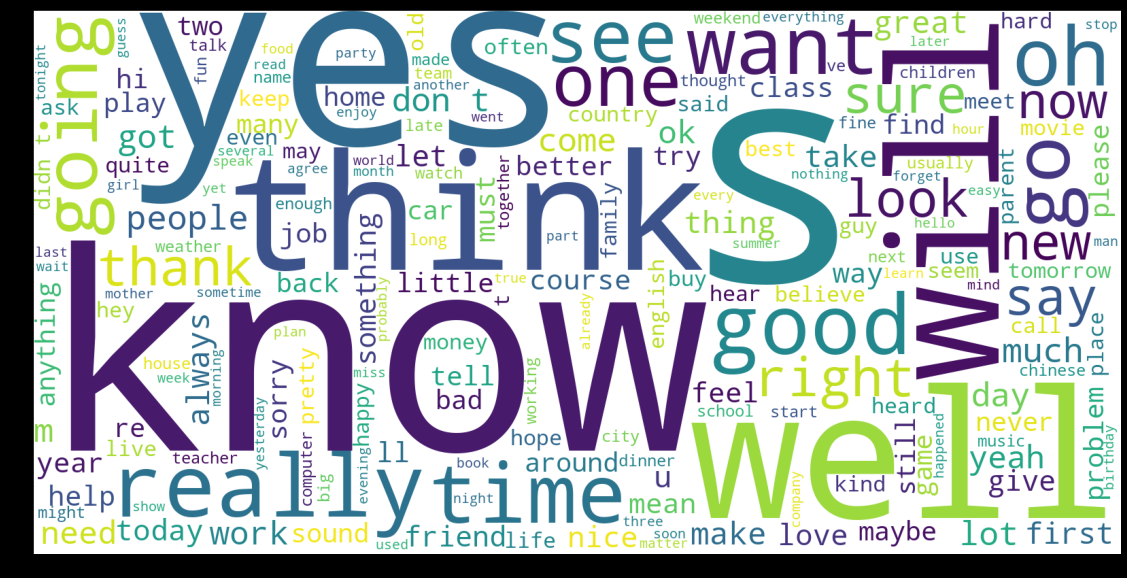

In [13]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_train['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('traincloud')

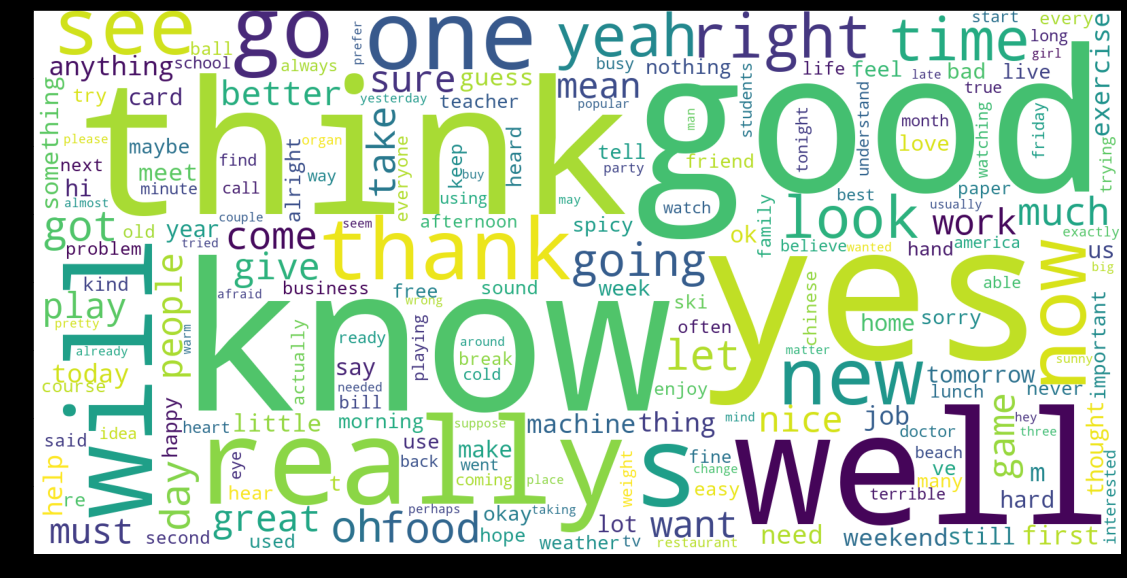

In [14]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_test['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('testcloud')

In [19]:
df_train_1 = df_train[df_train['act'] == 0]
df_train_2 = df_train[df_train['act'] == 1]
df_train_3 = df_train[df_train['act'] == 2]
df_train_4 = df_train[df_train['act'] == 3]

In [21]:
df_test_1 = df_test[df_test['act'] == 0]
df_test_2 = df_test[df_test['act'] == 1]
df_test_3 = df_test[df_test['act'] == 2]
df_test_4 = df_test[df_test['act'] == 3]

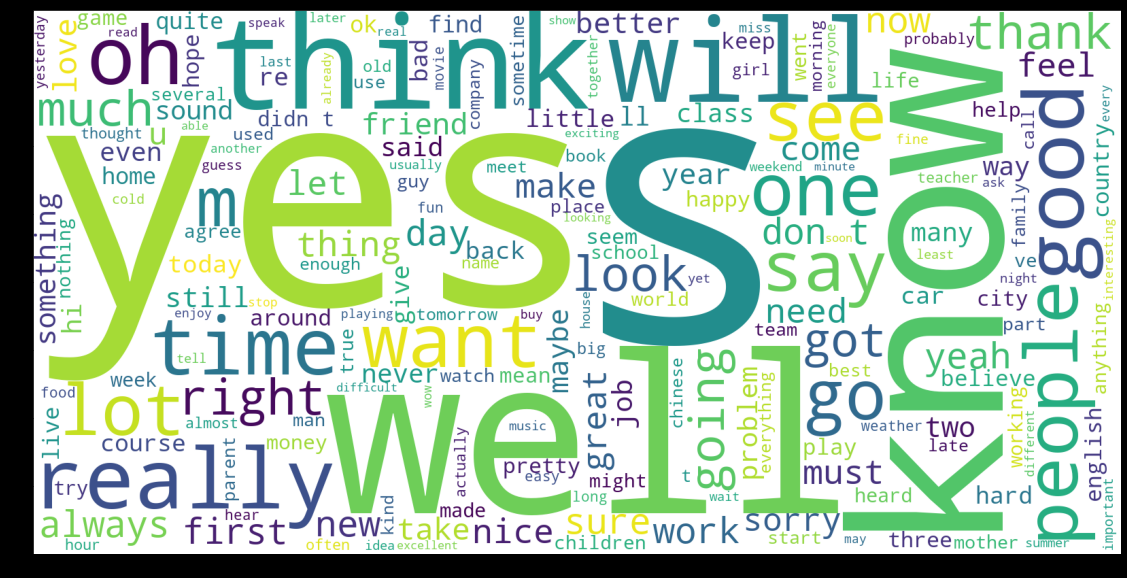

In [15]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_train_1['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('traincloud1')

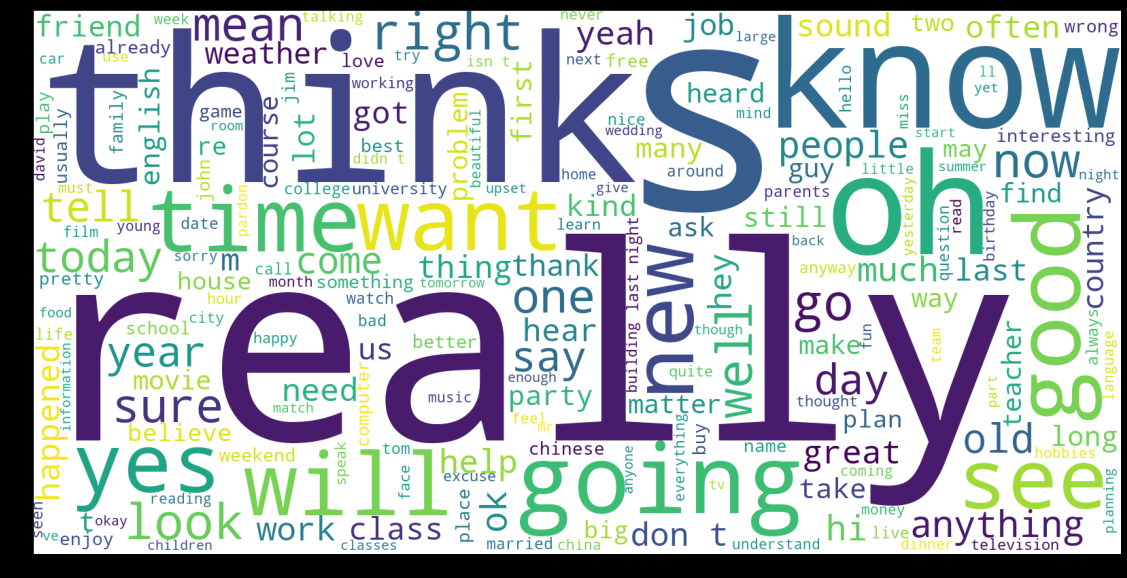

In [16]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_train_2['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('traincloud2')

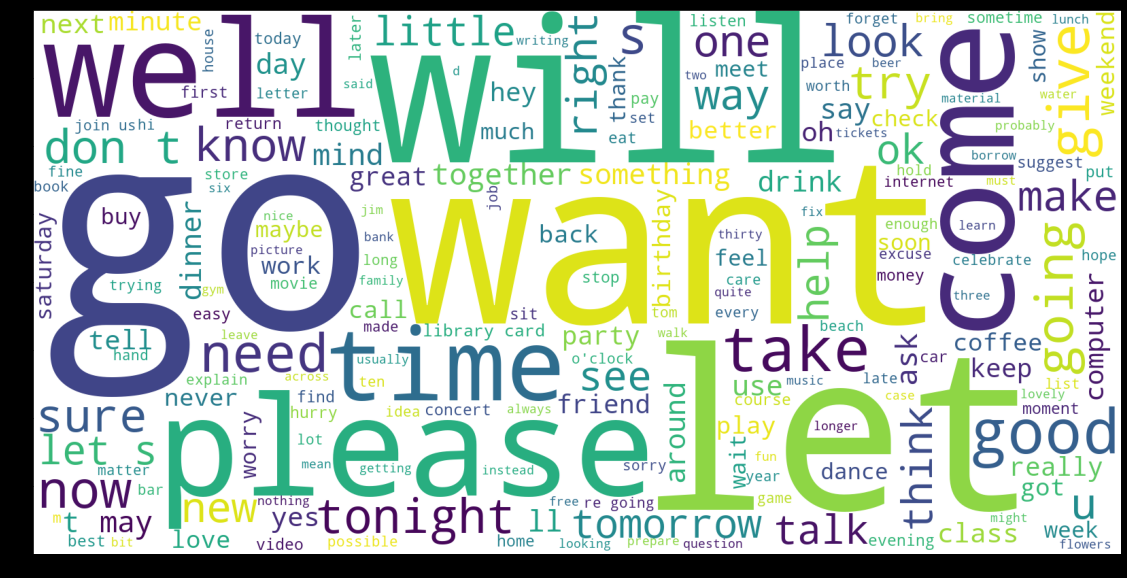

In [17]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_train_3['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('traincloud3')

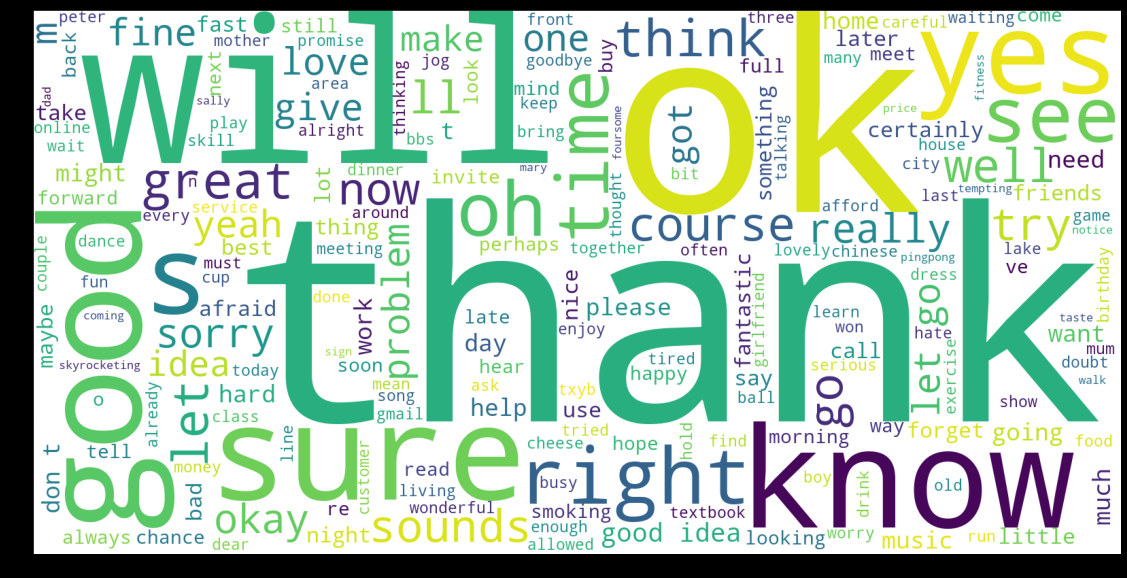

In [18]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_train_4['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('traincloud4')

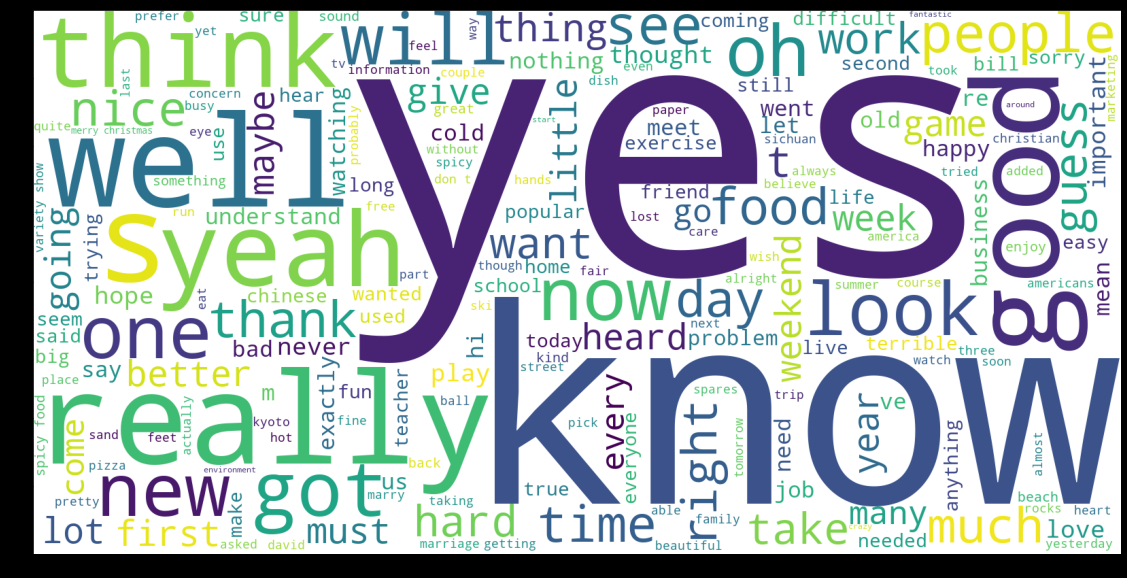

In [22]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_test_1['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('testcloud1')

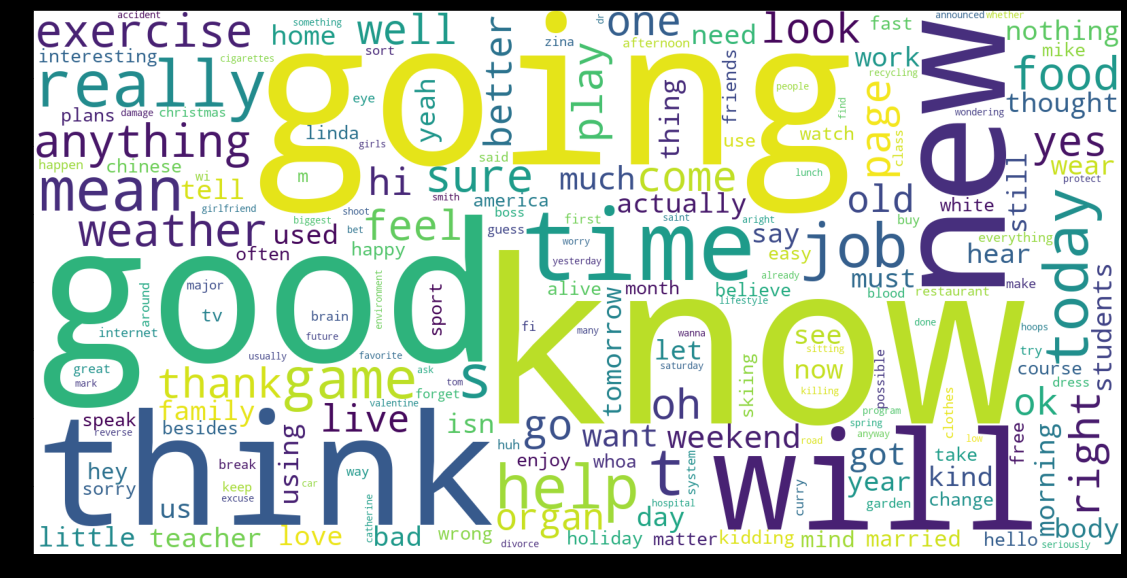

In [23]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_test_2['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('testcloud2')

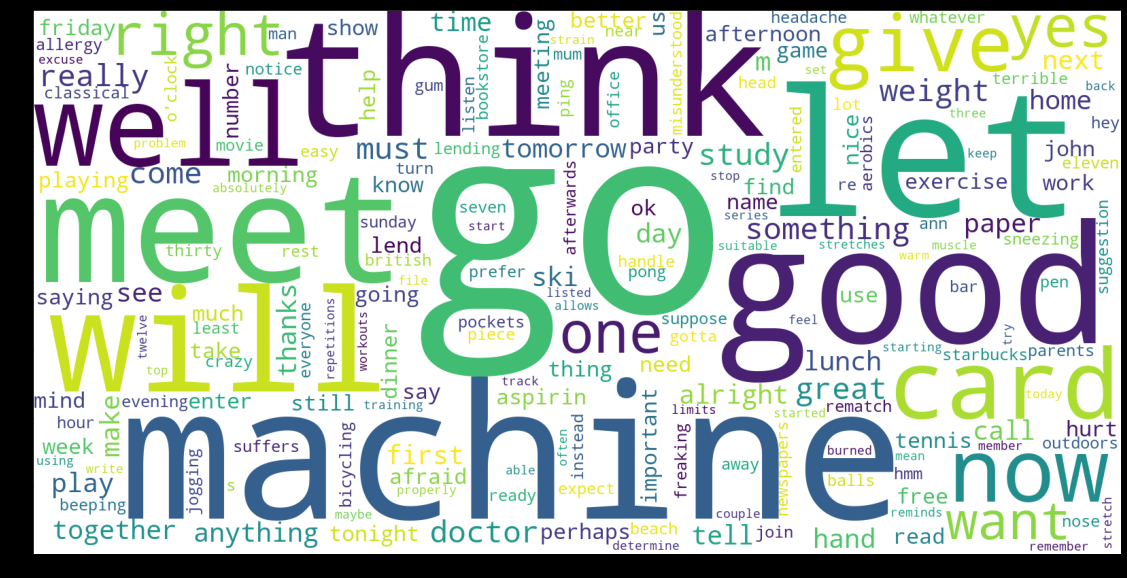

In [24]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_test_3['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('testcloud3')

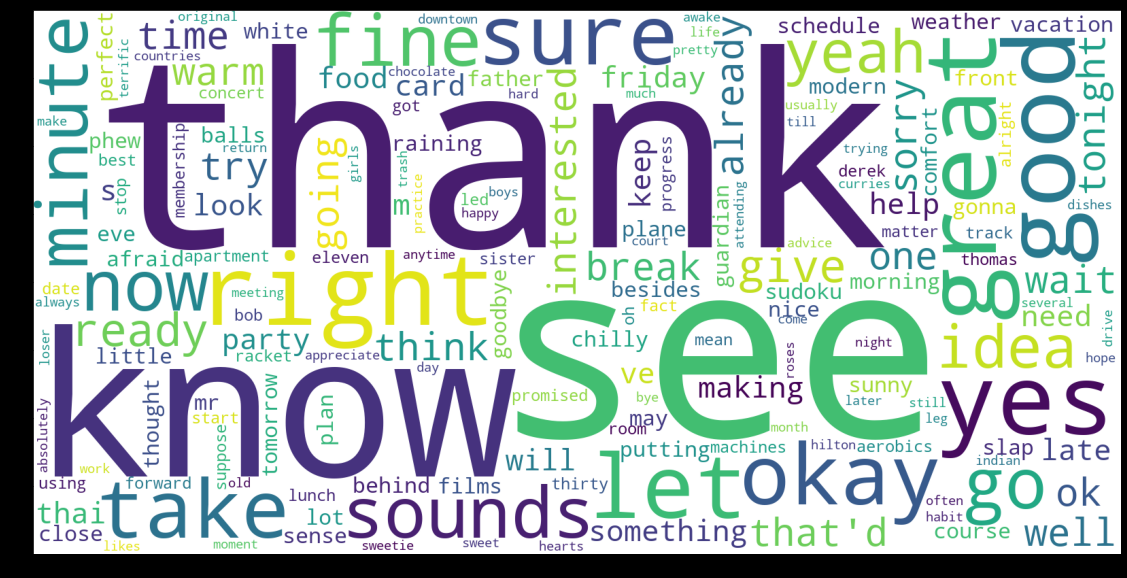

In [25]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_test_4['utterance'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.savefig('testcloud4')

# Q2

## Importing and preprocessing dataset

In [35]:
def preprocess_dataframe(df):
    #Lower text
    df['utterance'] = df['utterance'].str.lower()
    #Remove numbers
    df['utterance'] = df['utterance'].apply(lambda text : re.sub(r'[0-9]+', '', text))
    #Remove leading and trailing whitespaces
    df['utterance'] = df['utterance'].str.strip()
    #Fix labels
    df['act'] = df['act'].apply(lambda x : x-1)
    #Remove Special symbols other than !.,?
    df['utterance'] = df['utterance'].apply(lambda text : re.sub(r"[^a-z0-9\s?!.,]"," ",text))
    #Tokenize words
    df['utterance'] = df['utterance'].apply(word_tokenize)
    # #Stop word removal
    # df_train['utterance'] = df_train['utterance'].apply(lambda text : [w for w in text if not w in stop_words])
    #Lemmatization      
    df['utterance'] = df['utterance'].apply(lambda text : [lemmatizer.lemmatize(w) for w in text])
    # #Remove single letter words      
    # df_train['utterance'] = df_train['utterance'].apply(lambda text : ['' for elem in text if len(elem) == 1])
    #Make string again
    df['utterance'] = df['utterance'].apply(lambda text : ' '.join([str(elem) for elem in text]))
    #Drop empty rows
    df = df.loc[df['utterance'] != '']
    return df

In [38]:
#Import datasets
df_train = pd.read_csv("MDDA/train.csv")
df_test = pd.read_csv("MDDA/test.csv")
#Split Train into train and val in 85:15 ratio
df_train, df_val= train_test_split(df_train, test_size=0.15, random_state=42)
#Preprocess
df_train = preprocess_dataframe(df_train)
df_val = preprocess_dataframe(df_val)
df_test = preprocess_dataframe(df_test)

In [40]:
#Write to files
df_train.to_csv("MDDA/train_cleaner", index = False)
df_test.to_csv("MDDA/test_cleaner", index = False)
df_val.to_csv("MDDA/val_cleaner", index = False)

## Load preprocessed datasets

In [41]:
train = datasets.load_dataset("csv", data_files="MDDA\\train_cleaner")
train = train['train']

Using custom data configuration default-c0f1fa5989e4ad40


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\Devansh\.cache\huggingface\datasets\csv\default-c0f1fa5989e4ad40\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
val = datasets.load_dataset("csv", data_files="MDDA\\val_cleaner")
val = val['train']

Using custom data configuration default-4a41ea67a532a0dd


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\Devansh\.cache\huggingface\datasets\csv\default-4a41ea67a532a0dd\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
test = datasets.load_dataset("csv", data_files="MDDA\\test_cleaner")
test = test['train']

Using custom data configuration default-98c18ea21aedf963


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\Devansh\.cache\huggingface\datasets\csv\default-98c18ea21aedf963\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

## Prepare dataset for training

In [48]:
#Tokenize data
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')
def tokenize(row, tokenizer):
    tokens = tokenizer(row['utterance'])
    length = len(tokens)
    return {'tokens': tokens, 'length': length}

train_data = train.map(tokenize, fn_kwargs={'tokenizer': tokenizer})
val_data = val.map(tokenize, fn_kwargs={'tokenizer': tokenizer})
test_data = test.map(tokenize, fn_kwargs={'tokenizer': tokenizer})

In [51]:
#Vocabulary from train
min_freq = 5
special_tokens = ['<unk>', '<pad>']

vocab = torchtext.vocab.build_vocab_from_iterator(train_data['tokens'], min_freq=min_freq, specials=special_tokens)
unk_index = vocab['<unk>'] #Unknown index
pad_index = vocab['<pad>'] #Padding index
unk_index, pad_index

(0, 1)

In [52]:
vocab.set_default_index(unk_index)

In [54]:
#Convert string to numericals
def numericalize_data(row, vocab):
    ids = [vocab[token] for token in row['tokens']]
    return {'ids': ids}

train_data = train_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
val_data = val_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
test_data = test_data.map(numericalize_data, fn_kwargs={'vocab': vocab})

  0%|          | 0/4326 [00:00<?, ?ex/s]

  0%|          | 0/764 [00:00<?, ?ex/s]

  0%|          | 0/722 [00:00<?, ?ex/s]

In [56]:
#Convert to tensors
train_data = train_data.with_format(type='torch', columns=['ids', 'act', 'length'])
val_data = val_data.with_format(type='torch', columns=['ids', 'act', 'length'])
test_data = test_data.with_format(type='torch', columns=['ids', 'act', 'length'])
train_data[0]

{'act': tensor(0),
 'length': tensor(18),
 'ids': tensor([ 35, 246,  39,   8, 715, 405, 150,   2,  12,   3, 246,   4, 233,   4,
           3, 192,  15,   2])}

In [57]:
#CUDA INIT
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
device

device(type='cuda')

In [58]:
#DataLoader
def collate(batch, pad_index):
    batch_ids = [i['ids'] for i in batch]
    batch_ids = nn.utils.rnn.pad_sequence(batch_ids, padding_value=pad_index, batch_first=True)
    batch_length = [i['length'] for i in batch]
    batch_length = torch.stack(batch_length)
    batch_act = [i['act'] for i in batch]
    batch_act = torch.stack(batch_act)
    batch = {'ids': batch_ids,
             'length': batch_length,
             'act': batch_act}
    return batch

batch_size = 128
collate = functools.partial(collate, pad_index=pad_index)

train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, collate_fn=collate, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_data, batch_size=batch_size, collate_fn=collate)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=batch_size, collate_fn=collate)

In [59]:
#Loss function to device
cross_entropy = nn.CrossEntropyLoss()
cross_entropy = cross_entropy.to(device)

## Base Class

In [60]:
class Base(nn.Module):
    def training_step(self, batch):
        ids = batch['ids'].to(device)
        length = batch['length']
        act = batch['act'].to(device)
        out = self(ids, length)      
        loss = cross_entropy(out, act)
        score = accuracy(out, act)
        pred =  out.argmax(dim=-1)
        pred = pred.to('cpu')
        act = act.to('cpu')
        f1 = f1_score(act, pred, average='weighted')
        return {'loss': loss, 'score': score.item(), 'f1': f1 }
    
    def val_step(self, batch):
        ids = batch['ids'].to(device)
        length = batch['length']
        act = batch['act'].to(device)
        out = self(ids, length)                      
        loss = cross_entropy(out, act)
        score = accuracy(out, act)
        pred =  out.argmax(dim=-1)
        pred = pred.to('cpu')
        act = act.to('cpu')
        f1 = f1_score(act, pred, average='weighted')
        return {'val_loss': loss.item(), 'val_score': score.item(), 'val_f1': f1 }
        
    def val_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = np.mean(batch_losses) 
        batch_scores = [x['val_score'] for x in outputs]
        epoch_score = np.mean(batch_scores) 
        batch_f1 = [x['val_f1'] for x in outputs]
        epoch_f1 = np.mean(batch_f1) 
        return {'val_loss': epoch_loss.item(), 'val_score': epoch_score.item(), 'val_f1': epoch_f1.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, train_score: {:.4f}, train_f1: {:.4f}, val_loss: {:.4f}, val_score: {:.4f}, val_f1: {:.4f}".format(
            epoch + 1, result['train_loss'], result['train_score'], result['train_f1'], result['val_loss'], result['val_score'], result['val_f1']))

## LSTM

In [61]:
class LSTM_model(Base):
    def __init__(self, drop = 0.0, dimensions=128):
        super(LSTM_model, self).__init__()

        self.embedding = nn.Embedding(len(vocab), 300)
        self.dimension = dimensions
        self.lstm = nn.LSTM(input_size=300, hidden_size=dimensions, num_layers=1, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(2*dimensions, 4)
        self.dropout = nn.Dropout(p=drop)

    def forward(self, text, text_len):
        emb = self.embedding(text)

        packed_input = pack_padded_sequence(emb, text_len, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, _ = pad_packed_sequence(packed_output, batch_first=True)

        out_forward = output[range(len(output)), text_len - 1, :self.dimension]
        out_reverse = output[:, 0, self.dimension:]
        out_reduced = torch.cat((out_forward, out_reverse), 1)
        
        out = self.dropout(out_reduced)
        out = self.fc(out)
        out = torch.squeeze(out, 1)
        out = torch.sigmoid(out)

        return out

## Helper Functions

In [62]:
@torch.no_grad()

def evaluate(model, val_loader):
    model.eval()
    outputs = [model.val_step(batch) for batch in val_loader]
    return model.val_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        train_scores = []
        train_f1 = []
        for batch in tqdm(train_loader):
            params = torch.cat([x.view(-1) for x in model.fc.parameters()])
            step = model.training_step(batch)
            loss = step['loss']
            train_scores.append(step['score'])
            train_losses.append(loss.item())
            train_f1.append(step['f1'])
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = np.mean(train_losses)
        result['train_score'] = np.mean(train_scores)
        result['train_f1'] = np.mean(train_f1)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [63]:
def accuracy(pred, label):
    batch_size, _ = pred.shape
    pred_classes = pred.argmax(dim=-1)
    true_count = pred_classes.eq(label).sum()
    return true_count / batch_size

In [64]:
def plot_losses(history, name):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x.get('val_loss') for x in history]
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.savefig('graphs2\\'+name+'_loss.png')
    
def plot_accuracies(history, name):
    val_acc = [x['val_score'] for x in history]
    train_acc = [x['train_score'] for x in history]
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])
    plt.title('Accuracy vs. No. of epochs')
    plt.savefig('graphs2\\'+name+'_acc.png')
    
def plot_f1(history, name):
    val_f1 = [x['val_f1'] for x in history]
    train_f1 = [x['train_f1'] for x in history]
    plt.plot(train_f1)
    plt.plot(val_f1)
    plt.xlabel('epoch')
    plt.ylabel('Weighted F1')
    plt.legend(['Training', 'Validation'])
    plt.title('F1 vs. No. of epochs')
    plt.savefig('graphs2\\'+name+'_f1.png') 

# Q3

## a) X = 0

### keep_probability = 0.25

In [67]:
#Hyperparameters
num_epochs = 100
opt_func = torch.optim.Adam
lr= 0.001
dropout_prob = 0.25
name = 'X0_cleaner_P0.25'

In [68]:
model = LSTM_model(dropout_prob).to(device)
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [1], train_loss: 1.0533, train_score: 0.8126, train_f1: 0.7535, val_loss: 0.9417, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.9145, train_score: 0.8320, train_f1: 0.7688, val_loss: 0.9211, val_score: 0.8196, val_f1: 0.7509


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.9030, train_score: 0.8418, train_f1: 0.7778, val_loss: 0.9167, val_score: 0.8287, val_f1: 0.7593


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.9003, train_score: 0.8452, train_f1: 0.7814, val_loss: 0.9193, val_score: 0.8235, val_f1: 0.7544


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.8990, train_score: 0.8463, train_f1: 0.7820, val_loss: 0.9271, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.9031, train_score: 0.8398, train_f1: 0.7761, val_loss: 0.9183, val_score: 0.8275, val_f1: 0.7581


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.8956, train_score: 0.8474, train_f1: 0.7833, val_loss: 0.9199, val_score: 0.8196, val_f1: 0.7509


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.8908, train_score: 0.8499, train_f1: 0.7858, val_loss: 0.9149, val_score: 0.8275, val_f1: 0.7581


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.8874, train_score: 0.8499, train_f1: 0.7860, val_loss: 0.9129, val_score: 0.8262, val_f1: 0.7569


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.8841, train_score: 0.8517, train_f1: 0.7879, val_loss: 0.9128, val_score: 0.8248, val_f1: 0.7556


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.8800, train_score: 0.8517, train_f1: 0.7875, val_loss: 0.9111, val_score: 0.8262, val_f1: 0.7569


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.8765, train_score: 0.8515, train_f1: 0.7878, val_loss: 0.9128, val_score: 0.8222, val_f1: 0.7533


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.8732, train_score: 0.8524, train_f1: 0.7893, val_loss: 0.9113, val_score: 0.8235, val_f1: 0.7561


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.8688, train_score: 0.8525, train_f1: 0.7895, val_loss: 0.9106, val_score: 0.8248, val_f1: 0.7572


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [15], train_loss: 0.8656, train_score: 0.8537, train_f1: 0.7919, val_loss: 0.9110, val_score: 0.8235, val_f1: 0.7561


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [16], train_loss: 0.8630, train_score: 0.8553, train_f1: 0.7959, val_loss: 0.9120, val_score: 0.8222, val_f1: 0.7547


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [17], train_loss: 0.8571, train_score: 0.8563, train_f1: 0.7974, val_loss: 0.9032, val_score: 0.8288, val_f1: 0.7625


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.8496, train_score: 0.8600, train_f1: 0.8056, val_loss: 0.8999, val_score: 0.8275, val_f1: 0.7676


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.8419, train_score: 0.8631, train_f1: 0.8127, val_loss: 0.8963, val_score: 0.8249, val_f1: 0.7636


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [20], train_loss: 0.8350, train_score: 0.8648, train_f1: 0.8158, val_loss: 0.8992, val_score: 0.8262, val_f1: 0.7646


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [21], train_loss: 0.8293, train_score: 0.8711, train_f1: 0.8275, val_loss: 0.8979, val_score: 0.8262, val_f1: 0.7729


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [22], train_loss: 0.8257, train_score: 0.8761, train_f1: 0.8365, val_loss: 0.8931, val_score: 0.8327, val_f1: 0.7852


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [23], train_loss: 0.8210, train_score: 0.8833, train_f1: 0.8489, val_loss: 0.8931, val_score: 0.8340, val_f1: 0.7822


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [24], train_loss: 0.8260, train_score: 0.8822, train_f1: 0.8506, val_loss: 0.9004, val_score: 0.8274, val_f1: 0.7789


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [25], train_loss: 0.8226, train_score: 0.8855, train_f1: 0.8531, val_loss: 0.8931, val_score: 0.8379, val_f1: 0.7952


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [26], train_loss: 0.8157, train_score: 0.8972, train_f1: 0.8684, val_loss: 0.8958, val_score: 0.8340, val_f1: 0.7932


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [27], train_loss: 0.8114, train_score: 0.9093, train_f1: 0.8842, val_loss: 0.8955, val_score: 0.8367, val_f1: 0.8031


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [28], train_loss: 0.8101, train_score: 0.9100, train_f1: 0.8852, val_loss: 0.8974, val_score: 0.8353, val_f1: 0.8007


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [29], train_loss: 0.8065, train_score: 0.9208, train_f1: 0.9003, val_loss: 0.9048, val_score: 0.8288, val_f1: 0.7982


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [30], train_loss: 0.8054, train_score: 0.9213, train_f1: 0.9007, val_loss: 0.9039, val_score: 0.8222, val_f1: 0.7979


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [31], train_loss: 0.8028, train_score: 0.9239, train_f1: 0.9041, val_loss: 0.9058, val_score: 0.8327, val_f1: 0.8051


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [32], train_loss: 0.8016, train_score: 0.9259, train_f1: 0.9066, val_loss: 0.8987, val_score: 0.8393, val_f1: 0.8113


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [33], train_loss: 0.7986, train_score: 0.9270, train_f1: 0.9076, val_loss: 0.9008, val_score: 0.8405, val_f1: 0.8121


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [34], train_loss: 0.7973, train_score: 0.9281, train_f1: 0.9101, val_loss: 0.9007, val_score: 0.8366, val_f1: 0.8070


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [35], train_loss: 0.7968, train_score: 0.9283, train_f1: 0.9097, val_loss: 0.9023, val_score: 0.8353, val_f1: 0.8106


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [36], train_loss: 0.7960, train_score: 0.9278, train_f1: 0.9090, val_loss: 0.9031, val_score: 0.8366, val_f1: 0.8109


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [37], train_loss: 0.7953, train_score: 0.9290, train_f1: 0.9113, val_loss: 0.9028, val_score: 0.8366, val_f1: 0.8120


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [38], train_loss: 0.7949, train_score: 0.9300, train_f1: 0.9116, val_loss: 0.9034, val_score: 0.8379, val_f1: 0.8135


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [39], train_loss: 0.7947, train_score: 0.9313, train_f1: 0.9146, val_loss: 0.9038, val_score: 0.8353, val_f1: 0.8101


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [40], train_loss: 0.7944, train_score: 0.9312, train_f1: 0.9146, val_loss: 0.9053, val_score: 0.8313, val_f1: 0.8111


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [41], train_loss: 0.7947, train_score: 0.9326, train_f1: 0.9174, val_loss: 0.9052, val_score: 0.8327, val_f1: 0.8059


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [42], train_loss: 0.7942, train_score: 0.9330, train_f1: 0.9180, val_loss: 0.9034, val_score: 0.8301, val_f1: 0.8074


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [43], train_loss: 0.7933, train_score: 0.9368, train_f1: 0.9242, val_loss: 0.9057, val_score: 0.8261, val_f1: 0.8053


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [44], train_loss: 0.7929, train_score: 0.9393, train_f1: 0.9279, val_loss: 0.9061, val_score: 0.8261, val_f1: 0.8057


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [45], train_loss: 0.7927, train_score: 0.9438, train_f1: 0.9350, val_loss: 0.9066, val_score: 0.8261, val_f1: 0.8059


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [46], train_loss: 0.7921, train_score: 0.9451, train_f1: 0.9372, val_loss: 0.9113, val_score: 0.8275, val_f1: 0.8102


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [47], train_loss: 0.7913, train_score: 0.9505, train_f1: 0.9454, val_loss: 0.9125, val_score: 0.8247, val_f1: 0.8100


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [48], train_loss: 0.7889, train_score: 0.9524, train_f1: 0.9474, val_loss: 0.9149, val_score: 0.8275, val_f1: 0.8115


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [49], train_loss: 0.7878, train_score: 0.9532, train_f1: 0.9484, val_loss: 0.9190, val_score: 0.8222, val_f1: 0.8090


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [50], train_loss: 0.7868, train_score: 0.9556, train_f1: 0.9520, val_loss: 0.9134, val_score: 0.8196, val_f1: 0.8036


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [51], train_loss: 0.7866, train_score: 0.9552, train_f1: 0.9511, val_loss: 0.9160, val_score: 0.8222, val_f1: 0.8112


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [52], train_loss: 0.7857, train_score: 0.9563, train_f1: 0.9529, val_loss: 0.9189, val_score: 0.8222, val_f1: 0.8094


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [53], train_loss: 0.7848, train_score: 0.9572, train_f1: 0.9535, val_loss: 0.9157, val_score: 0.8275, val_f1: 0.8121


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [54], train_loss: 0.7839, train_score: 0.9566, train_f1: 0.9530, val_loss: 0.9173, val_score: 0.8183, val_f1: 0.8060


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [55], train_loss: 0.7836, train_score: 0.9570, train_f1: 0.9535, val_loss: 0.9207, val_score: 0.8222, val_f1: 0.8095


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [56], train_loss: 0.7829, train_score: 0.9592, train_f1: 0.9561, val_loss: 0.9187, val_score: 0.8130, val_f1: 0.8010


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [57], train_loss: 0.7834, train_score: 0.9581, train_f1: 0.9547, val_loss: 0.9214, val_score: 0.8157, val_f1: 0.8071


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [58], train_loss: 0.7835, train_score: 0.9578, train_f1: 0.9542, val_loss: 0.9131, val_score: 0.8235, val_f1: 0.8066


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [59], train_loss: 0.7863, train_score: 0.9551, train_f1: 0.9516, val_loss: 0.9184, val_score: 0.8143, val_f1: 0.8032


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [60], train_loss: 0.7863, train_score: 0.9557, train_f1: 0.9523, val_loss: 0.9201, val_score: 0.8077, val_f1: 0.7982


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [61], train_loss: 0.7842, train_score: 0.9574, train_f1: 0.9546, val_loss: 0.9198, val_score: 0.8209, val_f1: 0.8110


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [62], train_loss: 0.7842, train_score: 0.9574, train_f1: 0.9540, val_loss: 0.9208, val_score: 0.8144, val_f1: 0.8060


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [63], train_loss: 0.7815, train_score: 0.9597, train_f1: 0.9566, val_loss: 0.9212, val_score: 0.8144, val_f1: 0.8051


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [64], train_loss: 0.7806, train_score: 0.9600, train_f1: 0.9569, val_loss: 0.9217, val_score: 0.8183, val_f1: 0.8060


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [65], train_loss: 0.7801, train_score: 0.9612, train_f1: 0.9585, val_loss: 0.9207, val_score: 0.8170, val_f1: 0.8046


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [66], train_loss: 0.7799, train_score: 0.9607, train_f1: 0.9580, val_loss: 0.9196, val_score: 0.8144, val_f1: 0.8034


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [67], train_loss: 0.7797, train_score: 0.9608, train_f1: 0.9579, val_loss: 0.9190, val_score: 0.8196, val_f1: 0.8079


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [68], train_loss: 0.7795, train_score: 0.9613, train_f1: 0.9586, val_loss: 0.9200, val_score: 0.8183, val_f1: 0.8076


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [69], train_loss: 0.7791, train_score: 0.9608, train_f1: 0.9581, val_loss: 0.9226, val_score: 0.8157, val_f1: 0.8068


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [70], train_loss: 0.7789, train_score: 0.9615, train_f1: 0.9587, val_loss: 0.9210, val_score: 0.8209, val_f1: 0.8098


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [71], train_loss: 0.7789, train_score: 0.9621, train_f1: 0.9597, val_loss: 0.9211, val_score: 0.8209, val_f1: 0.8103


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [72], train_loss: 0.7788, train_score: 0.9627, train_f1: 0.9600, val_loss: 0.9200, val_score: 0.8196, val_f1: 0.8078


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [73], train_loss: 0.7786, train_score: 0.9611, train_f1: 0.9583, val_loss: 0.9215, val_score: 0.8196, val_f1: 0.8086


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [74], train_loss: 0.7784, train_score: 0.9620, train_f1: 0.9590, val_loss: 0.9223, val_score: 0.8130, val_f1: 0.8041


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [75], train_loss: 0.7785, train_score: 0.9624, train_f1: 0.9597, val_loss: 0.9185, val_score: 0.8196, val_f1: 0.8072


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [76], train_loss: 0.7782, train_score: 0.9628, train_f1: 0.9599, val_loss: 0.9200, val_score: 0.8196, val_f1: 0.8077


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [77], train_loss: 0.7777, train_score: 0.9638, train_f1: 0.9616, val_loss: 0.9188, val_score: 0.8209, val_f1: 0.8085


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [78], train_loss: 0.7778, train_score: 0.9627, train_f1: 0.9600, val_loss: 0.9198, val_score: 0.8209, val_f1: 0.8100


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [79], train_loss: 0.7776, train_score: 0.9639, train_f1: 0.9610, val_loss: 0.9205, val_score: 0.8196, val_f1: 0.8075


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [80], train_loss: 0.7773, train_score: 0.9627, train_f1: 0.9602, val_loss: 0.9204, val_score: 0.8209, val_f1: 0.8095


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [81], train_loss: 0.7774, train_score: 0.9631, train_f1: 0.9605, val_loss: 0.9190, val_score: 0.8196, val_f1: 0.8094


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [82], train_loss: 0.7771, train_score: 0.9632, train_f1: 0.9601, val_loss: 0.9190, val_score: 0.8222, val_f1: 0.8110


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [83], train_loss: 0.7772, train_score: 0.9630, train_f1: 0.9603, val_loss: 0.9195, val_score: 0.8183, val_f1: 0.8084


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [84], train_loss: 0.7768, train_score: 0.9639, train_f1: 0.9614, val_loss: 0.9205, val_score: 0.8196, val_f1: 0.8106


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [85], train_loss: 0.7767, train_score: 0.9632, train_f1: 0.9608, val_loss: 0.9176, val_score: 0.8236, val_f1: 0.8113


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [86], train_loss: 0.7769, train_score: 0.9634, train_f1: 0.9610, val_loss: 0.9178, val_score: 0.8235, val_f1: 0.8118


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [87], train_loss: 0.7769, train_score: 0.9637, train_f1: 0.9613, val_loss: 0.9169, val_score: 0.8209, val_f1: 0.8090


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [88], train_loss: 0.7767, train_score: 0.9641, train_f1: 0.9619, val_loss: 0.9188, val_score: 0.8222, val_f1: 0.8114


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [89], train_loss: 0.7766, train_score: 0.9639, train_f1: 0.9613, val_loss: 0.9174, val_score: 0.8222, val_f1: 0.8111


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [90], train_loss: 0.7767, train_score: 0.9639, train_f1: 0.9616, val_loss: 0.9203, val_score: 0.8262, val_f1: 0.8164


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [91], train_loss: 0.7770, train_score: 0.9636, train_f1: 0.9608, val_loss: 0.9180, val_score: 0.8262, val_f1: 0.8151


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [92], train_loss: 0.7770, train_score: 0.9651, train_f1: 0.9620, val_loss: 0.9173, val_score: 0.8183, val_f1: 0.8082


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [93], train_loss: 0.7769, train_score: 0.9637, train_f1: 0.9608, val_loss: 0.9249, val_score: 0.8183, val_f1: 0.8132


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [94], train_loss: 0.7767, train_score: 0.9643, train_f1: 0.9614, val_loss: 0.9161, val_score: 0.8275, val_f1: 0.8144


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [95], train_loss: 0.7764, train_score: 0.9637, train_f1: 0.9614, val_loss: 0.9193, val_score: 0.8209, val_f1: 0.8142


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [96], train_loss: 0.7763, train_score: 0.9643, train_f1: 0.9613, val_loss: 0.9178, val_score: 0.8208, val_f1: 0.8090


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [97], train_loss: 0.7762, train_score: 0.9648, train_f1: 0.9623, val_loss: 0.9184, val_score: 0.8222, val_f1: 0.8108


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [98], train_loss: 0.7762, train_score: 0.9644, train_f1: 0.9619, val_loss: 0.9188, val_score: 0.8195, val_f1: 0.8076


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [99], train_loss: 0.7762, train_score: 0.9641, train_f1: 0.9613, val_loss: 0.9186, val_score: 0.8222, val_f1: 0.8109


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [100], train_loss: 0.7762, train_score: 0.9634, train_f1: 0.9610, val_loss: 0.9191, val_score: 0.8222, val_f1: 0.8121


In [69]:
pkl.dump(model, open('models2\\'+name, 'wb'))

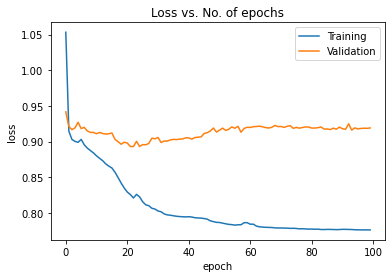

In [70]:
plot_losses(history, name)

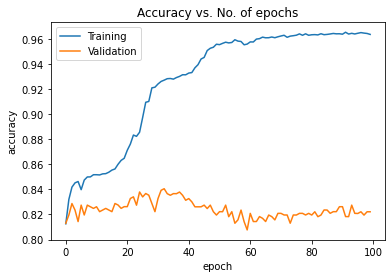

In [71]:
plot_accuracies(history, name)

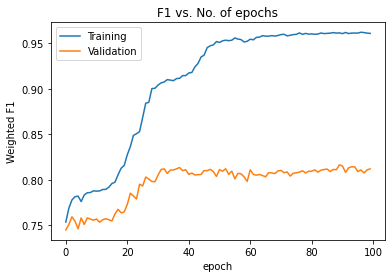

In [72]:
plot_f1(history, name)

In [73]:
train_acc = history[-1]['train_score']*100
val_acc = history[-1]['val_score']*100
test_acc = evaluate(model, test_dl)['val_score']*100
print("Train Accuracy: {:.4f}\nValidation Accuracy: {:.4f}\nTest Accuracy: {:.4f}".format(train_acc, val_acc, test_acc))

Train Accuracy: 96.3402
Validation Accuracy: 82.2161
Test Accuracy: 83.3841


### keep_probability = 0.50

In [74]:
dropout_prob = 0.5
name = 'X0_cleaner_P0.5'
model = LSTM_model(dropout_prob).to(device)
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [1], train_loss: 1.0600, train_score: 0.8116, train_f1: 0.7520, val_loss: 0.9442, val_score: 0.8117, val_f1: 0.7442


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.9178, train_score: 0.8308, train_f1: 0.7680, val_loss: 0.9261, val_score: 0.8157, val_f1: 0.7480


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.9063, train_score: 0.8371, train_f1: 0.7738, val_loss: 0.9223, val_score: 0.8196, val_f1: 0.7515


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.9001, train_score: 0.8443, train_f1: 0.7803, val_loss: 0.9219, val_score: 0.8209, val_f1: 0.7526


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.8982, train_score: 0.8466, train_f1: 0.7827, val_loss: 0.9250, val_score: 0.8209, val_f1: 0.7527


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.8973, train_score: 0.8467, train_f1: 0.7827, val_loss: 0.9193, val_score: 0.8209, val_f1: 0.7526


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.8947, train_score: 0.8494, train_f1: 0.7858, val_loss: 0.9197, val_score: 0.8222, val_f1: 0.7539


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.8932, train_score: 0.8505, train_f1: 0.7871, val_loss: 0.9215, val_score: 0.8196, val_f1: 0.7510


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.8898, train_score: 0.8527, train_f1: 0.7902, val_loss: 0.9178, val_score: 0.8248, val_f1: 0.7575


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.8846, train_score: 0.8561, train_f1: 0.7975, val_loss: 0.9152, val_score: 0.8183, val_f1: 0.7590


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.8781, train_score: 0.8602, train_f1: 0.8064, val_loss: 0.9125, val_score: 0.8209, val_f1: 0.7584


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.8685, train_score: 0.8652, train_f1: 0.8161, val_loss: 0.9115, val_score: 0.8235, val_f1: 0.7637


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.8601, train_score: 0.8695, train_f1: 0.8253, val_loss: 0.9080, val_score: 0.8249, val_f1: 0.7757


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.8520, train_score: 0.8771, train_f1: 0.8362, val_loss: 0.9084, val_score: 0.8209, val_f1: 0.7765


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [15], train_loss: 0.8467, train_score: 0.8789, train_f1: 0.8419, val_loss: 0.9095, val_score: 0.8235, val_f1: 0.7782


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [16], train_loss: 0.8366, train_score: 0.8891, train_f1: 0.8554, val_loss: 0.9044, val_score: 0.8248, val_f1: 0.7767


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [17], train_loss: 0.8288, train_score: 0.8954, train_f1: 0.8644, val_loss: 0.9109, val_score: 0.8261, val_f1: 0.7896


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.8253, train_score: 0.9003, train_f1: 0.8715, val_loss: 0.9102, val_score: 0.8261, val_f1: 0.7887


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.8201, train_score: 0.9033, train_f1: 0.8748, val_loss: 0.9054, val_score: 0.8288, val_f1: 0.7924


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [20], train_loss: 0.8171, train_score: 0.9077, train_f1: 0.8814, val_loss: 0.9035, val_score: 0.8288, val_f1: 0.7916


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [21], train_loss: 0.8150, train_score: 0.9107, train_f1: 0.8852, val_loss: 0.9042, val_score: 0.8301, val_f1: 0.7924


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [22], train_loss: 0.8093, train_score: 0.9160, train_f1: 0.8913, val_loss: 0.9077, val_score: 0.8235, val_f1: 0.7869


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [23], train_loss: 0.8073, train_score: 0.9176, train_f1: 0.8939, val_loss: 0.9062, val_score: 0.8261, val_f1: 0.7908


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [24], train_loss: 0.8048, train_score: 0.9211, train_f1: 0.8995, val_loss: 0.9068, val_score: 0.8300, val_f1: 0.7994


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [25], train_loss: 0.8042, train_score: 0.9212, train_f1: 0.8985, val_loss: 0.9081, val_score: 0.8274, val_f1: 0.7957


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [26], train_loss: 0.8024, train_score: 0.9220, train_f1: 0.8995, val_loss: 0.9117, val_score: 0.8248, val_f1: 0.7974


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [27], train_loss: 0.8018, train_score: 0.9232, train_f1: 0.9024, val_loss: 0.9028, val_score: 0.8314, val_f1: 0.7891


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [28], train_loss: 0.8007, train_score: 0.9223, train_f1: 0.8997, val_loss: 0.9064, val_score: 0.8274, val_f1: 0.7922


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [29], train_loss: 0.8023, train_score: 0.9217, train_f1: 0.9008, val_loss: 0.9052, val_score: 0.8300, val_f1: 0.7978


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [30], train_loss: 0.7998, train_score: 0.9261, train_f1: 0.9066, val_loss: 0.9054, val_score: 0.8248, val_f1: 0.7872


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [31], train_loss: 0.7981, train_score: 0.9239, train_f1: 0.9026, val_loss: 0.9038, val_score: 0.8275, val_f1: 0.7909


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [32], train_loss: 0.7974, train_score: 0.9289, train_f1: 0.9109, val_loss: 0.9099, val_score: 0.8248, val_f1: 0.7930


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [33], train_loss: 0.7964, train_score: 0.9286, train_f1: 0.9092, val_loss: 0.9077, val_score: 0.8301, val_f1: 0.8006


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [34], train_loss: 0.7954, train_score: 0.9296, train_f1: 0.9112, val_loss: 0.9084, val_score: 0.8275, val_f1: 0.7967


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [35], train_loss: 0.7949, train_score: 0.9296, train_f1: 0.9122, val_loss: 0.9053, val_score: 0.8327, val_f1: 0.8012


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [36], train_loss: 0.7945, train_score: 0.9296, train_f1: 0.9110, val_loss: 0.9087, val_score: 0.8327, val_f1: 0.8067


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [37], train_loss: 0.7943, train_score: 0.9315, train_f1: 0.9152, val_loss: 0.9079, val_score: 0.8235, val_f1: 0.7922


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [38], train_loss: 0.7935, train_score: 0.9315, train_f1: 0.9150, val_loss: 0.9077, val_score: 0.8301, val_f1: 0.8028


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [39], train_loss: 0.7934, train_score: 0.9335, train_f1: 0.9181, val_loss: 0.9095, val_score: 0.8275, val_f1: 0.7995


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [40], train_loss: 0.7933, train_score: 0.9324, train_f1: 0.9162, val_loss: 0.9068, val_score: 0.8314, val_f1: 0.8022


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [41], train_loss: 0.7926, train_score: 0.9346, train_f1: 0.9205, val_loss: 0.9062, val_score: 0.8340, val_f1: 0.8053


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [42], train_loss: 0.7926, train_score: 0.9351, train_f1: 0.9218, val_loss: 0.9073, val_score: 0.8301, val_f1: 0.8019


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [43], train_loss: 0.7924, train_score: 0.9360, train_f1: 0.9221, val_loss: 0.9098, val_score: 0.8262, val_f1: 0.8037


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [44], train_loss: 0.7921, train_score: 0.9401, train_f1: 0.9287, val_loss: 0.9072, val_score: 0.8275, val_f1: 0.8015


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [45], train_loss: 0.7920, train_score: 0.9377, train_f1: 0.9254, val_loss: 0.9073, val_score: 0.8301, val_f1: 0.8023


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [46], train_loss: 0.7917, train_score: 0.9380, train_f1: 0.9258, val_loss: 0.9075, val_score: 0.8262, val_f1: 0.8008


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [47], train_loss: 0.7915, train_score: 0.9377, train_f1: 0.9251, val_loss: 0.9091, val_score: 0.8262, val_f1: 0.8003


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [48], train_loss: 0.7920, train_score: 0.9396, train_f1: 0.9295, val_loss: 0.9184, val_score: 0.8183, val_f1: 0.8009


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [49], train_loss: 0.7940, train_score: 0.9419, train_f1: 0.9333, val_loss: 0.8970, val_score: 0.8340, val_f1: 0.8019


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [50], train_loss: 0.7977, train_score: 0.9334, train_f1: 0.9207, val_loss: 0.9067, val_score: 0.8288, val_f1: 0.8035


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [51], train_loss: 0.7941, train_score: 0.9412, train_f1: 0.9320, val_loss: 0.9194, val_score: 0.8117, val_f1: 0.7941


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [52], train_loss: 0.7933, train_score: 0.9440, train_f1: 0.9363, val_loss: 0.9156, val_score: 0.8196, val_f1: 0.7998


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [53], train_loss: 0.7915, train_score: 0.9443, train_f1: 0.9366, val_loss: 0.9121, val_score: 0.8183, val_f1: 0.7976


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [54], train_loss: 0.7910, train_score: 0.9497, train_f1: 0.9442, val_loss: 0.9134, val_score: 0.8170, val_f1: 0.7956


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [55], train_loss: 0.7899, train_score: 0.9479, train_f1: 0.9416, val_loss: 0.9161, val_score: 0.8143, val_f1: 0.7961


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [56], train_loss: 0.7884, train_score: 0.9537, train_f1: 0.9495, val_loss: 0.9146, val_score: 0.8130, val_f1: 0.7921


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [57], train_loss: 0.7871, train_score: 0.9566, train_f1: 0.9531, val_loss: 0.9178, val_score: 0.8118, val_f1: 0.7963


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [58], train_loss: 0.7852, train_score: 0.9582, train_f1: 0.9548, val_loss: 0.9199, val_score: 0.8131, val_f1: 0.7962


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [59], train_loss: 0.7842, train_score: 0.9577, train_f1: 0.9545, val_loss: 0.9175, val_score: 0.8183, val_f1: 0.8013


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [60], train_loss: 0.7835, train_score: 0.9593, train_f1: 0.9564, val_loss: 0.9244, val_score: 0.8196, val_f1: 0.8066


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [61], train_loss: 0.7828, train_score: 0.9592, train_f1: 0.9561, val_loss: 0.9187, val_score: 0.8183, val_f1: 0.8042


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [62], train_loss: 0.7816, train_score: 0.9600, train_f1: 0.9565, val_loss: 0.9201, val_score: 0.8209, val_f1: 0.8060


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [63], train_loss: 0.7811, train_score: 0.9604, train_f1: 0.9576, val_loss: 0.9154, val_score: 0.8197, val_f1: 0.8013


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [64], train_loss: 0.7810, train_score: 0.9602, train_f1: 0.9567, val_loss: 0.9173, val_score: 0.8223, val_f1: 0.8058


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [65], train_loss: 0.7803, train_score: 0.9616, train_f1: 0.9585, val_loss: 0.9168, val_score: 0.8196, val_f1: 0.8027


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [66], train_loss: 0.7802, train_score: 0.9612, train_f1: 0.9580, val_loss: 0.9207, val_score: 0.8170, val_f1: 0.8032


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [67], train_loss: 0.7802, train_score: 0.9606, train_f1: 0.9577, val_loss: 0.9191, val_score: 0.8157, val_f1: 0.7991


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [68], train_loss: 0.7813, train_score: 0.9592, train_f1: 0.9560, val_loss: 0.9239, val_score: 0.8183, val_f1: 0.8055


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [69], train_loss: 0.7804, train_score: 0.9611, train_f1: 0.9581, val_loss: 0.9153, val_score: 0.8209, val_f1: 0.8042


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [70], train_loss: 0.7803, train_score: 0.9601, train_f1: 0.9568, val_loss: 0.9154, val_score: 0.8262, val_f1: 0.8097


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [71], train_loss: 0.7797, train_score: 0.9617, train_f1: 0.9589, val_loss: 0.9168, val_score: 0.8235, val_f1: 0.8070


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [72], train_loss: 0.7796, train_score: 0.9615, train_f1: 0.9586, val_loss: 0.9163, val_score: 0.8236, val_f1: 0.8049


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [73], train_loss: 0.7793, train_score: 0.9615, train_f1: 0.9581, val_loss: 0.9175, val_score: 0.8249, val_f1: 0.8083


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [74], train_loss: 0.7794, train_score: 0.9607, train_f1: 0.9574, val_loss: 0.9180, val_score: 0.8223, val_f1: 0.8056


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [75], train_loss: 0.7792, train_score: 0.9614, train_f1: 0.9587, val_loss: 0.9153, val_score: 0.8209, val_f1: 0.8018


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [76], train_loss: 0.7790, train_score: 0.9620, train_f1: 0.9592, val_loss: 0.9192, val_score: 0.8222, val_f1: 0.8063


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [77], train_loss: 0.7792, train_score: 0.9618, train_f1: 0.9589, val_loss: 0.9177, val_score: 0.8209, val_f1: 0.8042


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [78], train_loss: 0.7792, train_score: 0.9622, train_f1: 0.9594, val_loss: 0.9180, val_score: 0.8210, val_f1: 0.8036


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [79], train_loss: 0.7790, train_score: 0.9617, train_f1: 0.9592, val_loss: 0.9186, val_score: 0.8209, val_f1: 0.8026


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [80], train_loss: 0.7789, train_score: 0.9620, train_f1: 0.9593, val_loss: 0.9199, val_score: 0.8209, val_f1: 0.8035


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [81], train_loss: 0.7791, train_score: 0.9615, train_f1: 0.9586, val_loss: 0.9187, val_score: 0.8222, val_f1: 0.8049


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [82], train_loss: 0.7787, train_score: 0.9631, train_f1: 0.9604, val_loss: 0.9195, val_score: 0.8262, val_f1: 0.8092


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [83], train_loss: 0.7787, train_score: 0.9626, train_f1: 0.9598, val_loss: 0.9183, val_score: 0.8288, val_f1: 0.8113


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [84], train_loss: 0.7788, train_score: 0.9627, train_f1: 0.9596, val_loss: 0.9185, val_score: 0.8248, val_f1: 0.8079


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [85], train_loss: 0.7786, train_score: 0.9628, train_f1: 0.9601, val_loss: 0.9176, val_score: 0.8249, val_f1: 0.8070


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [86], train_loss: 0.7786, train_score: 0.9629, train_f1: 0.9603, val_loss: 0.9186, val_score: 0.8249, val_f1: 0.8082


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [87], train_loss: 0.7784, train_score: 0.9617, train_f1: 0.9590, val_loss: 0.9174, val_score: 0.8288, val_f1: 0.8094


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [88], train_loss: 0.7785, train_score: 0.9631, train_f1: 0.9600, val_loss: 0.9189, val_score: 0.8301, val_f1: 0.8113


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [89], train_loss: 0.7785, train_score: 0.9625, train_f1: 0.9601, val_loss: 0.9193, val_score: 0.8235, val_f1: 0.8065


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [90], train_loss: 0.7786, train_score: 0.9637, train_f1: 0.9609, val_loss: 0.9197, val_score: 0.8288, val_f1: 0.8099


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [91], train_loss: 0.7784, train_score: 0.9630, train_f1: 0.9603, val_loss: 0.9206, val_score: 0.8235, val_f1: 0.8064


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [92], train_loss: 0.7784, train_score: 0.9637, train_f1: 0.9611, val_loss: 0.9186, val_score: 0.8235, val_f1: 0.8048


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [93], train_loss: 0.7783, train_score: 0.9639, train_f1: 0.9616, val_loss: 0.9205, val_score: 0.8262, val_f1: 0.8076


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [94], train_loss: 0.7782, train_score: 0.9628, train_f1: 0.9604, val_loss: 0.9180, val_score: 0.8274, val_f1: 0.8080


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [95], train_loss: 0.7781, train_score: 0.9630, train_f1: 0.9604, val_loss: 0.9179, val_score: 0.8288, val_f1: 0.8102


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [96], train_loss: 0.7780, train_score: 0.9646, train_f1: 0.9615, val_loss: 0.9189, val_score: 0.8235, val_f1: 0.8052


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [97], train_loss: 0.7778, train_score: 0.9633, train_f1: 0.9607, val_loss: 0.9242, val_score: 0.8183, val_f1: 0.8007


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [98], train_loss: 0.7780, train_score: 0.9637, train_f1: 0.9612, val_loss: 0.9168, val_score: 0.8222, val_f1: 0.8025


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [99], train_loss: 0.7781, train_score: 0.9632, train_f1: 0.9607, val_loss: 0.9177, val_score: 0.8236, val_f1: 0.8070


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [100], train_loss: 0.7783, train_score: 0.9632, train_f1: 0.9603, val_loss: 0.9164, val_score: 0.8248, val_f1: 0.8002


In [75]:
pkl.dump(model, open('models2\\'+name, 'wb'))

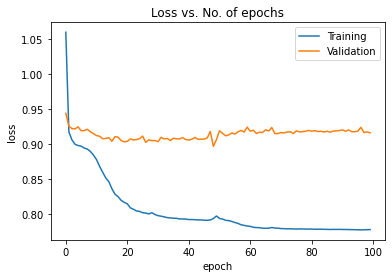

In [76]:
plot_losses(history, name)

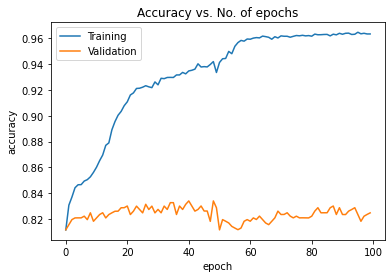

In [77]:
plot_accuracies(history, name)

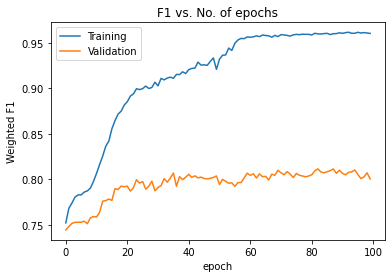

In [78]:
plot_f1(history, name)

In [79]:
train_acc = history[-1]['train_score']*100
val_acc = history[-1]['val_score']*100
test_acc = evaluate(model, test_dl)['val_score']*100
print("Train Accuracy: {:.4f}\nValidation Accuracy: {:.4f}\nTest Accuracy: {:.4f}".format(train_acc, val_acc, test_acc))

Train Accuracy: 96.3235
Validation Accuracy: 82.4807
Test Accuracy: 82.5870


### keep_probability = 0.75

In [81]:
dropout_prob = 0.75
name = 'X0_cleaner_P0.75'
model = LSTM_model(dropout_prob).to(device)
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [1], train_loss: 1.0798, train_score: 0.7882, train_f1: 0.7319, val_loss: 0.9521, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.9251, train_score: 0.8305, train_f1: 0.7675, val_loss: 0.9307, val_score: 0.8130, val_f1: 0.7450


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.9133, train_score: 0.8314, train_f1: 0.7683, val_loss: 0.9222, val_score: 0.8222, val_f1: 0.7536


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.9035, train_score: 0.8405, train_f1: 0.7769, val_loss: 0.9195, val_score: 0.8222, val_f1: 0.7533


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.9017, train_score: 0.8420, train_f1: 0.7782, val_loss: 0.9214, val_score: 0.8222, val_f1: 0.7533


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.8988, train_score: 0.8452, train_f1: 0.7812, val_loss: 0.9202, val_score: 0.8235, val_f1: 0.7545


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.8994, train_score: 0.8435, train_f1: 0.7797, val_loss: 0.9186, val_score: 0.8222, val_f1: 0.7533


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.8950, train_score: 0.8465, train_f1: 0.7826, val_loss: 0.9174, val_score: 0.8222, val_f1: 0.7533


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.8940, train_score: 0.8469, train_f1: 0.7832, val_loss: 0.9158, val_score: 0.8248, val_f1: 0.7556


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.8903, train_score: 0.8490, train_f1: 0.7857, val_loss: 0.9144, val_score: 0.8248, val_f1: 0.7556


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.8883, train_score: 0.8488, train_f1: 0.7850, val_loss: 0.9154, val_score: 0.8235, val_f1: 0.7545


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.8870, train_score: 0.8479, train_f1: 0.7847, val_loss: 0.9147, val_score: 0.8222, val_f1: 0.7533


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.8833, train_score: 0.8514, train_f1: 0.7892, val_loss: 0.9139, val_score: 0.8235, val_f1: 0.7544


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.8816, train_score: 0.8525, train_f1: 0.7910, val_loss: 0.9145, val_score: 0.8235, val_f1: 0.7561


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [15], train_loss: 0.8798, train_score: 0.8546, train_f1: 0.7946, val_loss: 0.9130, val_score: 0.8248, val_f1: 0.7588


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [16], train_loss: 0.8753, train_score: 0.8562, train_f1: 0.7999, val_loss: 0.9136, val_score: 0.8196, val_f1: 0.7533


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [17], train_loss: 0.8741, train_score: 0.8586, train_f1: 0.8032, val_loss: 0.9092, val_score: 0.8249, val_f1: 0.7616


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.8700, train_score: 0.8588, train_f1: 0.8043, val_loss: 0.9137, val_score: 0.8170, val_f1: 0.7529


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.8653, train_score: 0.8613, train_f1: 0.8098, val_loss: 0.9098, val_score: 0.8235, val_f1: 0.7617


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [20], train_loss: 0.8625, train_score: 0.8623, train_f1: 0.8118, val_loss: 0.9091, val_score: 0.8248, val_f1: 0.7594


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [21], train_loss: 0.8573, train_score: 0.8657, train_f1: 0.8190, val_loss: 0.9046, val_score: 0.8287, val_f1: 0.7692


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [22], train_loss: 0.8538, train_score: 0.8668, train_f1: 0.8214, val_loss: 0.9054, val_score: 0.8275, val_f1: 0.7673


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [23], train_loss: 0.8513, train_score: 0.8695, train_f1: 0.8264, val_loss: 0.9044, val_score: 0.8262, val_f1: 0.7753


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [24], train_loss: 0.8545, train_score: 0.8676, train_f1: 0.8257, val_loss: 0.9054, val_score: 0.8288, val_f1: 0.7680


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [25], train_loss: 0.8451, train_score: 0.8775, train_f1: 0.8404, val_loss: 0.9043, val_score: 0.8287, val_f1: 0.7760


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [26], train_loss: 0.8420, train_score: 0.8814, train_f1: 0.8480, val_loss: 0.9071, val_score: 0.8222, val_f1: 0.7665


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [27], train_loss: 0.8390, train_score: 0.8847, train_f1: 0.8532, val_loss: 0.9045, val_score: 0.8274, val_f1: 0.7807


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [28], train_loss: 0.8372, train_score: 0.8935, train_f1: 0.8659, val_loss: 0.9071, val_score: 0.8313, val_f1: 0.7879


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [29], train_loss: 0.8311, train_score: 0.8987, train_f1: 0.8739, val_loss: 0.9062, val_score: 0.8287, val_f1: 0.7839


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [30], train_loss: 0.8286, train_score: 0.8997, train_f1: 0.8755, val_loss: 0.9050, val_score: 0.8261, val_f1: 0.7842


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [31], train_loss: 0.8269, train_score: 0.9031, train_f1: 0.8832, val_loss: 0.9011, val_score: 0.8301, val_f1: 0.7930


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [32], train_loss: 0.8211, train_score: 0.9070, train_f1: 0.8858, val_loss: 0.9005, val_score: 0.8327, val_f1: 0.7963


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [33], train_loss: 0.8174, train_score: 0.9126, train_f1: 0.8924, val_loss: 0.9024, val_score: 0.8354, val_f1: 0.7982


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [34], train_loss: 0.8168, train_score: 0.9140, train_f1: 0.8961, val_loss: 0.9030, val_score: 0.8340, val_f1: 0.8045


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [35], train_loss: 0.8173, train_score: 0.9099, train_f1: 0.8886, val_loss: 0.9037, val_score: 0.8301, val_f1: 0.7926


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [36], train_loss: 0.8138, train_score: 0.9119, train_f1: 0.8906, val_loss: 0.9022, val_score: 0.8328, val_f1: 0.7957


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [37], train_loss: 0.8130, train_score: 0.9141, train_f1: 0.8936, val_loss: 0.9013, val_score: 0.8353, val_f1: 0.7961


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [38], train_loss: 0.8125, train_score: 0.9168, train_f1: 0.8986, val_loss: 0.9027, val_score: 0.8327, val_f1: 0.7971


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [39], train_loss: 0.8108, train_score: 0.9183, train_f1: 0.9005, val_loss: 0.9032, val_score: 0.8327, val_f1: 0.7935


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [40], train_loss: 0.8107, train_score: 0.9160, train_f1: 0.8964, val_loss: 0.8998, val_score: 0.8380, val_f1: 0.7990


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [41], train_loss: 0.8088, train_score: 0.9190, train_f1: 0.9007, val_loss: 0.9047, val_score: 0.8301, val_f1: 0.7914


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [42], train_loss: 0.8070, train_score: 0.9180, train_f1: 0.8981, val_loss: 0.9042, val_score: 0.8367, val_f1: 0.7990


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [43], train_loss: 0.8086, train_score: 0.9175, train_f1: 0.8979, val_loss: 0.9010, val_score: 0.8340, val_f1: 0.7902


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [44], train_loss: 0.8105, train_score: 0.9173, train_f1: 0.8981, val_loss: 0.9018, val_score: 0.8406, val_f1: 0.8020


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [45], train_loss: 0.8080, train_score: 0.9184, train_f1: 0.8990, val_loss: 0.9048, val_score: 0.8327, val_f1: 0.7969


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [46], train_loss: 0.8067, train_score: 0.9182, train_f1: 0.8984, val_loss: 0.8965, val_score: 0.8432, val_f1: 0.8046


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [47], train_loss: 0.8060, train_score: 0.9184, train_f1: 0.8992, val_loss: 0.9007, val_score: 0.8354, val_f1: 0.7991


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [48], train_loss: 0.8057, train_score: 0.9223, train_f1: 0.9053, val_loss: 0.8999, val_score: 0.8406, val_f1: 0.8055


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [49], train_loss: 0.8052, train_score: 0.9235, train_f1: 0.9064, val_loss: 0.8977, val_score: 0.8445, val_f1: 0.8050


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [50], train_loss: 0.8043, train_score: 0.9230, train_f1: 0.9049, val_loss: 0.8987, val_score: 0.8432, val_f1: 0.8045


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [51], train_loss: 0.8042, train_score: 0.9223, train_f1: 0.9048, val_loss: 0.8955, val_score: 0.8341, val_f1: 0.7968


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [52], train_loss: 0.8051, train_score: 0.9235, train_f1: 0.9060, val_loss: 0.9004, val_score: 0.8394, val_f1: 0.8044


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [53], train_loss: 0.8048, train_score: 0.9243, train_f1: 0.9080, val_loss: 0.8999, val_score: 0.8381, val_f1: 0.8055


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [54], train_loss: 0.8058, train_score: 0.9222, train_f1: 0.9056, val_loss: 0.9122, val_score: 0.8288, val_f1: 0.8002


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [55], train_loss: 0.8120, train_score: 0.9161, train_f1: 0.8980, val_loss: 0.9005, val_score: 0.8380, val_f1: 0.7932


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [56], train_loss: 0.8132, train_score: 0.9157, train_f1: 0.8981, val_loss: 0.9020, val_score: 0.8407, val_f1: 0.8117


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [57], train_loss: 0.8106, train_score: 0.9197, train_f1: 0.9023, val_loss: 0.9031, val_score: 0.8327, val_f1: 0.7966


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [58], train_loss: 0.8053, train_score: 0.9246, train_f1: 0.9090, val_loss: 0.9021, val_score: 0.8367, val_f1: 0.8022


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [59], train_loss: 0.8029, train_score: 0.9266, train_f1: 0.9125, val_loss: 0.9021, val_score: 0.8354, val_f1: 0.8001


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [60], train_loss: 0.8027, train_score: 0.9292, train_f1: 0.9149, val_loss: 0.9036, val_score: 0.8328, val_f1: 0.7990


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [61], train_loss: 0.8024, train_score: 0.9293, train_f1: 0.9155, val_loss: 0.9036, val_score: 0.8301, val_f1: 0.7945


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [62], train_loss: 0.8009, train_score: 0.9308, train_f1: 0.9175, val_loss: 0.9064, val_score: 0.8328, val_f1: 0.7975


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [63], train_loss: 0.8008, train_score: 0.9285, train_f1: 0.9147, val_loss: 0.9057, val_score: 0.8302, val_f1: 0.7945


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [64], train_loss: 0.8022, train_score: 0.9307, train_f1: 0.9171, val_loss: 0.9041, val_score: 0.8341, val_f1: 0.8020


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [65], train_loss: 0.8014, train_score: 0.9343, train_f1: 0.9236, val_loss: 0.9047, val_score: 0.8342, val_f1: 0.8020


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [66], train_loss: 0.8005, train_score: 0.9305, train_f1: 0.9171, val_loss: 0.9056, val_score: 0.8368, val_f1: 0.8059


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [67], train_loss: 0.7993, train_score: 0.9322, train_f1: 0.9193, val_loss: 0.9054, val_score: 0.8381, val_f1: 0.8080


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [68], train_loss: 0.8008, train_score: 0.9309, train_f1: 0.9179, val_loss: 0.9058, val_score: 0.8329, val_f1: 0.8017


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [69], train_loss: 0.8011, train_score: 0.9301, train_f1: 0.9160, val_loss: 0.9023, val_score: 0.8368, val_f1: 0.8058


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [70], train_loss: 0.8008, train_score: 0.9320, train_f1: 0.9187, val_loss: 0.9061, val_score: 0.8302, val_f1: 0.8001


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [71], train_loss: 0.8006, train_score: 0.9348, train_f1: 0.9246, val_loss: 0.9063, val_score: 0.8328, val_f1: 0.8011


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [72], train_loss: 0.8003, train_score: 0.9315, train_f1: 0.9184, val_loss: 0.9100, val_score: 0.8276, val_f1: 0.7958


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [73], train_loss: 0.7993, train_score: 0.9323, train_f1: 0.9201, val_loss: 0.9095, val_score: 0.8250, val_f1: 0.7948


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [74], train_loss: 0.8003, train_score: 0.9348, train_f1: 0.9240, val_loss: 0.9093, val_score: 0.8238, val_f1: 0.7927


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [75], train_loss: 0.7981, train_score: 0.9342, train_f1: 0.9223, val_loss: 0.9087, val_score: 0.8276, val_f1: 0.7944


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [76], train_loss: 0.7980, train_score: 0.9366, train_f1: 0.9256, val_loss: 0.9129, val_score: 0.8276, val_f1: 0.7974


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [77], train_loss: 0.7982, train_score: 0.9362, train_f1: 0.9258, val_loss: 0.9094, val_score: 0.8263, val_f1: 0.7937


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [78], train_loss: 0.7980, train_score: 0.9333, train_f1: 0.9210, val_loss: 0.9104, val_score: 0.8302, val_f1: 0.8000


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [79], train_loss: 0.7977, train_score: 0.9369, train_f1: 0.9270, val_loss: 0.9081, val_score: 0.8328, val_f1: 0.8063


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [80], train_loss: 0.7977, train_score: 0.9393, train_f1: 0.9306, val_loss: 0.9090, val_score: 0.8328, val_f1: 0.8070


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [81], train_loss: 0.7964, train_score: 0.9413, train_f1: 0.9331, val_loss: 0.9086, val_score: 0.8315, val_f1: 0.8053


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [82], train_loss: 0.7968, train_score: 0.9421, train_f1: 0.9346, val_loss: 0.9092, val_score: 0.8354, val_f1: 0.8094


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [83], train_loss: 0.7968, train_score: 0.9427, train_f1: 0.9356, val_loss: 0.9081, val_score: 0.8328, val_f1: 0.8087


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [84], train_loss: 0.8029, train_score: 0.9385, train_f1: 0.9318, val_loss: 0.9094, val_score: 0.8315, val_f1: 0.8047


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [85], train_loss: 0.7997, train_score: 0.9404, train_f1: 0.9336, val_loss: 0.9077, val_score: 0.8368, val_f1: 0.8128


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [86], train_loss: 0.7964, train_score: 0.9459, train_f1: 0.9401, val_loss: 0.9062, val_score: 0.8342, val_f1: 0.8081


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [87], train_loss: 0.7959, train_score: 0.9454, train_f1: 0.9393, val_loss: 0.9081, val_score: 0.8341, val_f1: 0.8132


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [88], train_loss: 0.7945, train_score: 0.9479, train_f1: 0.9423, val_loss: 0.9046, val_score: 0.8314, val_f1: 0.8100


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [89], train_loss: 0.7932, train_score: 0.9500, train_f1: 0.9452, val_loss: 0.9056, val_score: 0.8288, val_f1: 0.8055


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [90], train_loss: 0.7931, train_score: 0.9518, train_f1: 0.9479, val_loss: 0.9095, val_score: 0.8288, val_f1: 0.8062


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [91], train_loss: 0.7923, train_score: 0.9527, train_f1: 0.9490, val_loss: 0.9113, val_score: 0.8236, val_f1: 0.8019


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [92], train_loss: 0.7919, train_score: 0.9543, train_f1: 0.9504, val_loss: 0.9130, val_score: 0.8236, val_f1: 0.8031


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [93], train_loss: 0.7906, train_score: 0.9553, train_f1: 0.9523, val_loss: 0.9140, val_score: 0.8235, val_f1: 0.8015


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [94], train_loss: 0.7898, train_score: 0.9550, train_f1: 0.9518, val_loss: 0.9142, val_score: 0.8222, val_f1: 0.8007


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [95], train_loss: 0.7888, train_score: 0.9551, train_f1: 0.9518, val_loss: 0.9153, val_score: 0.8262, val_f1: 0.8035


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [96], train_loss: 0.7891, train_score: 0.9557, train_f1: 0.9526, val_loss: 0.9140, val_score: 0.8249, val_f1: 0.8031


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [97], train_loss: 0.7880, train_score: 0.9554, train_f1: 0.9520, val_loss: 0.9145, val_score: 0.8262, val_f1: 0.8041


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [98], train_loss: 0.7879, train_score: 0.9554, train_f1: 0.9519, val_loss: 0.9120, val_score: 0.8341, val_f1: 0.8124


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [99], train_loss: 0.7873, train_score: 0.9558, train_f1: 0.9529, val_loss: 0.9144, val_score: 0.8302, val_f1: 0.8087


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [100], train_loss: 0.7863, train_score: 0.9570, train_f1: 0.9540, val_loss: 0.9185, val_score: 0.8275, val_f1: 0.8076


In [82]:
pkl.dump(model, open('models2\\'+name, 'wb'))

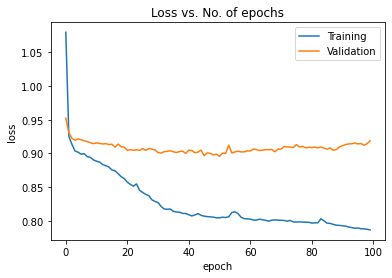

In [83]:
plot_losses(history, name)

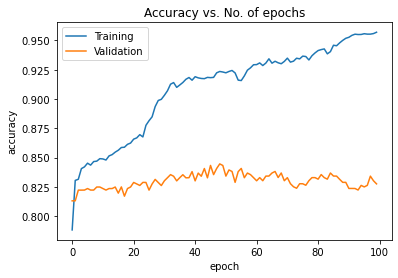

In [84]:
plot_accuracies(history, name)

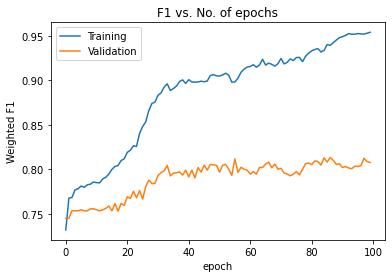

In [85]:
plot_f1(history, name)

In [86]:
train_acc = history[-1]['train_score']*100
val_acc = history[-1]['val_score']*100
test_acc = evaluate(model, test_dl)['val_score']*100
print("Train Accuracy: {:.4f}\nValidation Accuracy: {:.4f}\nTest Accuracy: {:.4f}".format(train_acc, val_acc, test_acc))

Train Accuracy: 95.6968
Validation Accuracy: 82.7495
Test Accuracy: 82.7903


## b) X = 1

In [87]:
df_train = pd.read_csv("MDDA/train_cleaner")
df_train_x1 = pd.read_csv("MDDA/train_cleaner")
for idx, row in df_train_x1.iterrows():
    if idx >= 1:
        df_train_x1.at[idx, 'utterance'] = df_train['utterance'][idx-1]+df_train['utterance'][idx]
df_train_x1.to_csv("MDDA/train_x1_cleaner", index = False)

In [88]:
train = datasets.load_dataset("csv", data_files="MDDA\\train_x1_cleaner")
train = train['train']
train_data = train.map(tokenize, fn_kwargs={'tokenizer': tokenizer})
train_data = train_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
train_data = train_data.with_format(type='torch', columns=['ids', 'act', 'length'])

Using custom data configuration default-dac358956a903095


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\Devansh\.cache\huggingface\datasets\csv\default-dac358956a903095\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4326 [00:00<?, ?ex/s]

  0%|          | 0/4326 [00:00<?, ?ex/s]

In [89]:
train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, collate_fn=collate, shuffle=True)

In [90]:
dropout_prob = 0.25
name = 'X1_cleaner'
model = LSTM_model(dropout_prob).to(device)
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [1], train_loss: 1.0650, train_score: 0.8054, train_f1: 0.7443, val_loss: 0.9482, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.9205, train_score: 0.8309, train_f1: 0.7680, val_loss: 0.9359, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.9157, train_score: 0.8310, train_f1: 0.7683, val_loss: 0.9341, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.9147, train_score: 0.8309, train_f1: 0.7680, val_loss: 0.9331, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.9140, train_score: 0.8309, train_f1: 0.7682, val_loss: 0.9322, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.9137, train_score: 0.8311, train_f1: 0.7681, val_loss: 0.9319, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.9134, train_score: 0.8311, train_f1: 0.7683, val_loss: 0.9311, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.9128, train_score: 0.8316, train_f1: 0.7687, val_loss: 0.9307, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.9131, train_score: 0.8312, train_f1: 0.7684, val_loss: 0.9306, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.9128, train_score: 0.8314, train_f1: 0.7683, val_loss: 0.9295, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.9125, train_score: 0.8317, train_f1: 0.7688, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.9123, train_score: 0.8317, train_f1: 0.7688, val_loss: 0.9300, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.9123, train_score: 0.8317, train_f1: 0.7688, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.9121, train_score: 0.8318, train_f1: 0.7689, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [15], train_loss: 0.9123, train_score: 0.8315, train_f1: 0.7687, val_loss: 0.9299, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [16], train_loss: 0.9119, train_score: 0.8319, train_f1: 0.7690, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [17], train_loss: 0.9119, train_score: 0.8318, train_f1: 0.7691, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.9117, train_score: 0.8320, train_f1: 0.7691, val_loss: 0.9303, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.9121, train_score: 0.8316, train_f1: 0.7687, val_loss: 0.9296, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [20], train_loss: 0.9121, train_score: 0.8315, train_f1: 0.7687, val_loss: 0.9302, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [21], train_loss: 0.9120, train_score: 0.8314, train_f1: 0.7682, val_loss: 0.9276, val_score: 0.8170, val_f1: 0.7486


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [22], train_loss: 0.9119, train_score: 0.8319, train_f1: 0.7689, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [23], train_loss: 0.9116, train_score: 0.8320, train_f1: 0.7691, val_loss: 0.9298, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [24], train_loss: 0.9112, train_score: 0.8323, train_f1: 0.7695, val_loss: 0.9301, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [25], train_loss: 0.9116, train_score: 0.8319, train_f1: 0.7687, val_loss: 0.9300, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [26], train_loss: 0.9117, train_score: 0.8318, train_f1: 0.7687, val_loss: 0.9299, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [27], train_loss: 0.9113, train_score: 0.8322, train_f1: 0.7691, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [28], train_loss: 0.9113, train_score: 0.8322, train_f1: 0.7692, val_loss: 0.9300, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [29], train_loss: 0.9115, train_score: 0.8320, train_f1: 0.7691, val_loss: 0.9300, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [30], train_loss: 0.9114, train_score: 0.8320, train_f1: 0.7689, val_loss: 0.9299, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [31], train_loss: 0.9114, train_score: 0.8320, train_f1: 0.7691, val_loss: 0.9298, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [32], train_loss: 0.9113, train_score: 0.8319, train_f1: 0.7687, val_loss: 0.9291, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [33], train_loss: 0.9104, train_score: 0.8325, train_f1: 0.7694, val_loss: 0.9278, val_score: 0.8196, val_f1: 0.7511


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [34], train_loss: 0.9097, train_score: 0.8337, train_f1: 0.7706, val_loss: 0.9296, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [35], train_loss: 0.9091, train_score: 0.8344, train_f1: 0.7709, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [36], train_loss: 0.9084, train_score: 0.8351, train_f1: 0.7719, val_loss: 0.9282, val_score: 0.8183, val_f1: 0.7498


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [37], train_loss: 0.9064, train_score: 0.8367, train_f1: 0.7736, val_loss: 0.9294, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [38], train_loss: 0.9057, train_score: 0.8372, train_f1: 0.7735, val_loss: 0.9303, val_score: 0.8170, val_f1: 0.7491


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [39], train_loss: 0.9050, train_score: 0.8373, train_f1: 0.7738, val_loss: 0.9305, val_score: 0.8170, val_f1: 0.7491


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [40], train_loss: 0.9041, train_score: 0.8376, train_f1: 0.7742, val_loss: 0.9319, val_score: 0.8157, val_f1: 0.7471


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [41], train_loss: 0.9034, train_score: 0.8380, train_f1: 0.7747, val_loss: 0.9297, val_score: 0.8170, val_f1: 0.7485


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [42], train_loss: 0.9030, train_score: 0.8383, train_f1: 0.7750, val_loss: 0.9305, val_score: 0.8170, val_f1: 0.7485


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [43], train_loss: 0.9011, train_score: 0.8400, train_f1: 0.7762, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [44], train_loss: 0.9001, train_score: 0.8407, train_f1: 0.7771, val_loss: 0.9295, val_score: 0.8157, val_f1: 0.7473


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [45], train_loss: 0.8991, train_score: 0.8409, train_f1: 0.7773, val_loss: 0.9294, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [46], train_loss: 0.8981, train_score: 0.8415, train_f1: 0.7778, val_loss: 0.9309, val_score: 0.8143, val_f1: 0.7460


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [47], train_loss: 0.8982, train_score: 0.8417, train_f1: 0.7780, val_loss: 0.9295, val_score: 0.8157, val_f1: 0.7472


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [48], train_loss: 0.8980, train_score: 0.8418, train_f1: 0.7780, val_loss: 0.9291, val_score: 0.8157, val_f1: 0.7473


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [49], train_loss: 0.8980, train_score: 0.8415, train_f1: 0.7777, val_loss: 0.9299, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [50], train_loss: 0.8972, train_score: 0.8419, train_f1: 0.7780, val_loss: 0.9295, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [51], train_loss: 0.8969, train_score: 0.8421, train_f1: 0.7783, val_loss: 0.9298, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [52], train_loss: 0.8970, train_score: 0.8420, train_f1: 0.7781, val_loss: 0.9292, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [53], train_loss: 0.8965, train_score: 0.8421, train_f1: 0.7781, val_loss: 0.9290, val_score: 0.8170, val_f1: 0.7486


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [54], train_loss: 0.8961, train_score: 0.8424, train_f1: 0.7782, val_loss: 0.9286, val_score: 0.8170, val_f1: 0.7486


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [55], train_loss: 0.8955, train_score: 0.8430, train_f1: 0.7798, val_loss: 0.9296, val_score: 0.8157, val_f1: 0.7473


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [56], train_loss: 0.8953, train_score: 0.8430, train_f1: 0.7795, val_loss: 0.9283, val_score: 0.8170, val_f1: 0.7492


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [57], train_loss: 0.8948, train_score: 0.8434, train_f1: 0.7800, val_loss: 0.9283, val_score: 0.8157, val_f1: 0.7479


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [58], train_loss: 0.8954, train_score: 0.8426, train_f1: 0.7785, val_loss: 0.9283, val_score: 0.8170, val_f1: 0.7492


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [59], train_loss: 0.8942, train_score: 0.8435, train_f1: 0.7802, val_loss: 0.9312, val_score: 0.8143, val_f1: 0.7468


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [60], train_loss: 0.8946, train_score: 0.8445, train_f1: 0.7824, val_loss: 0.9289, val_score: 0.8170, val_f1: 0.7486


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [61], train_loss: 0.8939, train_score: 0.8449, train_f1: 0.7841, val_loss: 0.9278, val_score: 0.8170, val_f1: 0.7486


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [62], train_loss: 0.8938, train_score: 0.8461, train_f1: 0.7860, val_loss: 0.9279, val_score: 0.8183, val_f1: 0.7498


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [63], train_loss: 0.8935, train_score: 0.8487, train_f1: 0.7927, val_loss: 0.9283, val_score: 0.8196, val_f1: 0.7538


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [64], train_loss: 0.8898, train_score: 0.8527, train_f1: 0.8012, val_loss: 0.9264, val_score: 0.8183, val_f1: 0.7559


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [65], train_loss: 0.8851, train_score: 0.8556, train_f1: 0.8071, val_loss: 0.9217, val_score: 0.8196, val_f1: 0.7582


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [66], train_loss: 0.8789, train_score: 0.8586, train_f1: 0.8119, val_loss: 0.9243, val_score: 0.8196, val_f1: 0.7670


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [67], train_loss: 0.8720, train_score: 0.8652, train_f1: 0.8250, val_loss: 0.9223, val_score: 0.8235, val_f1: 0.7699


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [68], train_loss: 0.8666, train_score: 0.8754, train_f1: 0.8436, val_loss: 0.9249, val_score: 0.8209, val_f1: 0.7714


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [69], train_loss: 0.8623, train_score: 0.8768, train_f1: 0.8450, val_loss: 0.9212, val_score: 0.8235, val_f1: 0.7695


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [70], train_loss: 0.8574, train_score: 0.8822, train_f1: 0.8532, val_loss: 0.9249, val_score: 0.8170, val_f1: 0.7728


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [71], train_loss: 0.8535, train_score: 0.8837, train_f1: 0.8558, val_loss: 0.9259, val_score: 0.8196, val_f1: 0.7765


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [72], train_loss: 0.8497, train_score: 0.8879, train_f1: 0.8630, val_loss: 0.9312, val_score: 0.8091, val_f1: 0.7733


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [73], train_loss: 0.8463, train_score: 0.8916, train_f1: 0.8682, val_loss: 0.9276, val_score: 0.8169, val_f1: 0.7730


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [74], train_loss: 0.8442, train_score: 0.8939, train_f1: 0.8707, val_loss: 0.9399, val_score: 0.7984, val_f1: 0.7701


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [75], train_loss: 0.8420, train_score: 0.8957, train_f1: 0.8758, val_loss: 0.9262, val_score: 0.8168, val_f1: 0.7798


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [76], train_loss: 0.8409, train_score: 0.8970, train_f1: 0.8774, val_loss: 0.9308, val_score: 0.8142, val_f1: 0.7827


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [77], train_loss: 0.8366, train_score: 0.9018, train_f1: 0.8842, val_loss: 0.9299, val_score: 0.8168, val_f1: 0.7870


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [78], train_loss: 0.8332, train_score: 0.9045, train_f1: 0.8870, val_loss: 0.9375, val_score: 0.8076, val_f1: 0.7821


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [79], train_loss: 0.8316, train_score: 0.9065, train_f1: 0.8904, val_loss: 0.9261, val_score: 0.8155, val_f1: 0.7812


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [80], train_loss: 0.8290, train_score: 0.9092, train_f1: 0.8941, val_loss: 0.9353, val_score: 0.8064, val_f1: 0.7859


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [81], train_loss: 0.8266, train_score: 0.9124, train_f1: 0.8991, val_loss: 0.9319, val_score: 0.8116, val_f1: 0.7845


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [82], train_loss: 0.8246, train_score: 0.9162, train_f1: 0.9038, val_loss: 0.9373, val_score: 0.7986, val_f1: 0.7766


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [83], train_loss: 0.8222, train_score: 0.9195, train_f1: 0.9087, val_loss: 0.9378, val_score: 0.8038, val_f1: 0.7816


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [84], train_loss: 0.8197, train_score: 0.9230, train_f1: 0.9127, val_loss: 0.9379, val_score: 0.7999, val_f1: 0.7795


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [85], train_loss: 0.8189, train_score: 0.9234, train_f1: 0.9128, val_loss: 0.9338, val_score: 0.8090, val_f1: 0.7876


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [86], train_loss: 0.8177, train_score: 0.9254, train_f1: 0.9163, val_loss: 0.9396, val_score: 0.7946, val_f1: 0.7783


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [87], train_loss: 0.8157, train_score: 0.9263, train_f1: 0.9179, val_loss: 0.9444, val_score: 0.7985, val_f1: 0.7818


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [88], train_loss: 0.8139, train_score: 0.9288, train_f1: 0.9208, val_loss: 0.9537, val_score: 0.7893, val_f1: 0.7784


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [89], train_loss: 0.8133, train_score: 0.9294, train_f1: 0.9217, val_loss: 0.9501, val_score: 0.7933, val_f1: 0.7810


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [90], train_loss: 0.8122, train_score: 0.9319, train_f1: 0.9249, val_loss: 0.9513, val_score: 0.7814, val_f1: 0.7727


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [91], train_loss: 0.8111, train_score: 0.9318, train_f1: 0.9249, val_loss: 0.9520, val_score: 0.7867, val_f1: 0.7748


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [92], train_loss: 0.8102, train_score: 0.9326, train_f1: 0.9259, val_loss: 0.9658, val_score: 0.7775, val_f1: 0.7733


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [93], train_loss: 0.8094, train_score: 0.9330, train_f1: 0.9258, val_loss: 0.9528, val_score: 0.7841, val_f1: 0.7742


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [94], train_loss: 0.8080, train_score: 0.9357, train_f1: 0.9295, val_loss: 0.9606, val_score: 0.7788, val_f1: 0.7718


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [95], train_loss: 0.8072, train_score: 0.9353, train_f1: 0.9289, val_loss: 0.9522, val_score: 0.7828, val_f1: 0.7722


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [96], train_loss: 0.8070, train_score: 0.9361, train_f1: 0.9301, val_loss: 0.9613, val_score: 0.7736, val_f1: 0.7670


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [97], train_loss: 0.8066, train_score: 0.9362, train_f1: 0.9302, val_loss: 0.9703, val_score: 0.7723, val_f1: 0.7684


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [98], train_loss: 0.8065, train_score: 0.9363, train_f1: 0.9308, val_loss: 0.9653, val_score: 0.7736, val_f1: 0.7683


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [99], train_loss: 0.8059, train_score: 0.9370, train_f1: 0.9310, val_loss: 0.9608, val_score: 0.7816, val_f1: 0.7723


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [100], train_loss: 0.8055, train_score: 0.9366, train_f1: 0.9308, val_loss: 0.9727, val_score: 0.7657, val_f1: 0.7640


In [91]:
pkl.dump(model, open('models2\\'+name, 'wb'))

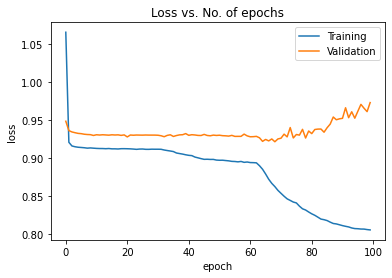

In [92]:
plot_losses(history, name)

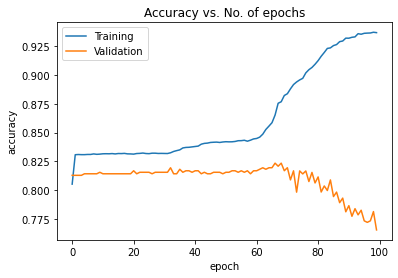

In [93]:
plot_accuracies(history, name)

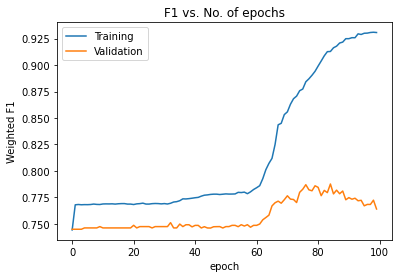

In [94]:
plot_f1(history, name)

In [95]:
train_acc = history[-1]['train_score']*100
val_acc = history[-1]['val_score']*100
test_acc = evaluate(model, test_dl)['val_score']*100
print("Train Accuracy: {:.4f}\nValidation Accuracy: {:.4f}\nTest Accuracy: {:.4f}".format(train_acc, val_acc, test_acc))

Train Accuracy: 93.6630
Validation Accuracy: 76.5709
Test Accuracy: 74.1902


## c) X = 2

In [97]:
df_train = pd.read_csv("MDDA/train_cleaner")
df_train_x2 = pd.read_csv("MDDA/train_cleaner")
for idx, row in df_train_x2.iterrows():
    if idx >= 2:
        df_train_x2.at[idx, 'utterance'] = df_train['utterance'][idx-2] + df_train['utterance'][idx-1]+df_train['utterance'][idx]
df_train_x2.to_csv("MDDA/train_x2_cleaner", index = False)

In [98]:
train = datasets.load_dataset("csv", data_files="MDDA\\train_x2_cleaner")
train = train['train']
train_data = train.map(tokenize, fn_kwargs={'tokenizer': tokenizer})
train_data = train_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
train_data = train_data.with_format(type='torch', columns=['ids', 'act', 'length'])

Using custom data configuration default-8be37e4cce5e576e


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\Devansh\.cache\huggingface\datasets\csv\default-8be37e4cce5e576e\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4326 [00:00<?, ?ex/s]

  0%|          | 0/4326 [00:00<?, ?ex/s]

In [99]:
train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, collate_fn=collate, shuffle=True)

In [100]:
dropout_prob = 0.25
name = 'X2_cleaner'
model = LSTM_model(dropout_prob).to(device)
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [1], train_loss: 1.0584, train_score: 0.8122, train_f1: 0.7517, val_loss: 0.9460, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.9194, train_score: 0.8306, train_f1: 0.7678, val_loss: 0.9350, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.9157, train_score: 0.8304, train_f1: 0.7675, val_loss: 0.9336, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.9148, train_score: 0.8303, train_f1: 0.7673, val_loss: 0.9326, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.9130, train_score: 0.8317, train_f1: 0.7692, val_loss: 0.9314, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.9132, train_score: 0.8310, train_f1: 0.7679, val_loss: 0.9307, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.9126, train_score: 0.8320, train_f1: 0.7692, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.9126, train_score: 0.8317, train_f1: 0.7687, val_loss: 0.9308, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.9123, train_score: 0.8319, train_f1: 0.7690, val_loss: 0.9305, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.9122, train_score: 0.8319, train_f1: 0.7688, val_loss: 0.9308, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.9120, train_score: 0.8320, train_f1: 0.7690, val_loss: 0.9303, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.9121, train_score: 0.8318, train_f1: 0.7688, val_loss: 0.9307, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.9119, train_score: 0.8320, train_f1: 0.7689, val_loss: 0.9305, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.9122, train_score: 0.8317, train_f1: 0.7684, val_loss: 0.9308, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [15], train_loss: 0.9116, train_score: 0.8322, train_f1: 0.7694, val_loss: 0.9306, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [16], train_loss: 0.9120, train_score: 0.8318, train_f1: 0.7687, val_loss: 0.9307, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [17], train_loss: 0.9118, train_score: 0.8320, train_f1: 0.7689, val_loss: 0.9302, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.9120, train_score: 0.8317, train_f1: 0.7686, val_loss: 0.9307, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.9119, train_score: 0.8318, train_f1: 0.7690, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [20], train_loss: 0.9120, train_score: 0.8317, train_f1: 0.7685, val_loss: 0.9305, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [21], train_loss: 0.9118, train_score: 0.8319, train_f1: 0.7688, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [22], train_loss: 0.9119, train_score: 0.8317, train_f1: 0.7686, val_loss: 0.9306, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [23], train_loss: 0.9118, train_score: 0.8318, train_f1: 0.7689, val_loss: 0.9303, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [24], train_loss: 0.9115, train_score: 0.8321, train_f1: 0.7691, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [25], train_loss: 0.9118, train_score: 0.8318, train_f1: 0.7689, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [26], train_loss: 0.9115, train_score: 0.8321, train_f1: 0.7693, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [27], train_loss: 0.9118, train_score: 0.8317, train_f1: 0.7688, val_loss: 0.9302, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [28], train_loss: 0.9115, train_score: 0.8321, train_f1: 0.7691, val_loss: 0.9303, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [29], train_loss: 0.9114, train_score: 0.8321, train_f1: 0.7692, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [30], train_loss: 0.9113, train_score: 0.8322, train_f1: 0.7693, val_loss: 0.9302, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [31], train_loss: 0.9118, train_score: 0.8317, train_f1: 0.7687, val_loss: 0.9302, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [32], train_loss: 0.9113, train_score: 0.8322, train_f1: 0.7694, val_loss: 0.9301, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [33], train_loss: 0.9117, train_score: 0.8319, train_f1: 0.7689, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [34], train_loss: 0.9116, train_score: 0.8320, train_f1: 0.7693, val_loss: 0.9300, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [35], train_loss: 0.9113, train_score: 0.8321, train_f1: 0.7691, val_loss: 0.9294, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [36], train_loss: 0.9112, train_score: 0.8320, train_f1: 0.7689, val_loss: 0.9296, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [37], train_loss: 0.9107, train_score: 0.8322, train_f1: 0.7692, val_loss: 0.9288, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [38], train_loss: 0.9106, train_score: 0.8324, train_f1: 0.7695, val_loss: 0.9293, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [39], train_loss: 0.9104, train_score: 0.8326, train_f1: 0.7696, val_loss: 0.9303, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [40], train_loss: 0.9107, train_score: 0.8324, train_f1: 0.7693, val_loss: 0.9299, val_score: 0.8143, val_f1: 0.7462


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [41], train_loss: 0.9104, train_score: 0.8325, train_f1: 0.7696, val_loss: 0.9299, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [42], train_loss: 0.9099, train_score: 0.8330, train_f1: 0.7699, val_loss: 0.9296, val_score: 0.8143, val_f1: 0.7462


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [43], train_loss: 0.9098, train_score: 0.8330, train_f1: 0.7697, val_loss: 0.9292, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [44], train_loss: 0.9091, train_score: 0.8338, train_f1: 0.7707, val_loss: 0.9279, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [45], train_loss: 0.9083, train_score: 0.8350, train_f1: 0.7719, val_loss: 0.9293, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [46], train_loss: 0.9081, train_score: 0.8344, train_f1: 0.7715, val_loss: 0.9290, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [47], train_loss: 0.9070, train_score: 0.8356, train_f1: 0.7727, val_loss: 0.9299, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [48], train_loss: 0.9064, train_score: 0.8357, train_f1: 0.7725, val_loss: 0.9303, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [49], train_loss: 0.9059, train_score: 0.8361, train_f1: 0.7726, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7462


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [50], train_loss: 0.9056, train_score: 0.8366, train_f1: 0.7732, val_loss: 0.9295, val_score: 0.8170, val_f1: 0.7487


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [51], train_loss: 0.9052, train_score: 0.8368, train_f1: 0.7735, val_loss: 0.9294, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [52], train_loss: 0.9043, train_score: 0.8372, train_f1: 0.7737, val_loss: 0.9289, val_score: 0.8170, val_f1: 0.7486


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [53], train_loss: 0.9033, train_score: 0.8381, train_f1: 0.7745, val_loss: 0.9278, val_score: 0.8183, val_f1: 0.7498


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [54], train_loss: 0.9023, train_score: 0.8386, train_f1: 0.7749, val_loss: 0.9280, val_score: 0.8183, val_f1: 0.7498


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [55], train_loss: 0.9023, train_score: 0.8384, train_f1: 0.7745, val_loss: 0.9269, val_score: 0.8196, val_f1: 0.7511


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [56], train_loss: 0.9011, train_score: 0.8389, train_f1: 0.7756, val_loss: 0.9288, val_score: 0.8183, val_f1: 0.7498


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [57], train_loss: 0.9005, train_score: 0.8392, train_f1: 0.7754, val_loss: 0.9277, val_score: 0.8196, val_f1: 0.7511


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [58], train_loss: 0.9003, train_score: 0.8394, train_f1: 0.7756, val_loss: 0.9283, val_score: 0.8183, val_f1: 0.7498


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [59], train_loss: 0.9000, train_score: 0.8396, train_f1: 0.7760, val_loss: 0.9284, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [60], train_loss: 0.8990, train_score: 0.8402, train_f1: 0.7763, val_loss: 0.9283, val_score: 0.8157, val_f1: 0.7475


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [61], train_loss: 0.8991, train_score: 0.8407, train_f1: 0.7771, val_loss: 0.9275, val_score: 0.8170, val_f1: 0.7487


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [62], train_loss: 0.8982, train_score: 0.8410, train_f1: 0.7772, val_loss: 0.9288, val_score: 0.8170, val_f1: 0.7486


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [63], train_loss: 0.8973, train_score: 0.8410, train_f1: 0.7771, val_loss: 0.9288, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [64], train_loss: 0.8968, train_score: 0.8413, train_f1: 0.7774, val_loss: 0.9291, val_score: 0.8170, val_f1: 0.7486


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [65], train_loss: 0.8964, train_score: 0.8410, train_f1: 0.7771, val_loss: 0.9292, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [66], train_loss: 0.8958, train_score: 0.8414, train_f1: 0.7777, val_loss: 0.9294, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [67], train_loss: 0.8959, train_score: 0.8416, train_f1: 0.7779, val_loss: 0.9299, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [68], train_loss: 0.8961, train_score: 0.8409, train_f1: 0.7771, val_loss: 0.9299, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [69], train_loss: 0.8954, train_score: 0.8413, train_f1: 0.7778, val_loss: 0.9312, val_score: 0.8157, val_f1: 0.7475


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [70], train_loss: 0.8956, train_score: 0.8412, train_f1: 0.7773, val_loss: 0.9308, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [71], train_loss: 0.8949, train_score: 0.8413, train_f1: 0.7774, val_loss: 0.9312, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [72], train_loss: 0.8947, train_score: 0.8413, train_f1: 0.7774, val_loss: 0.9311, val_score: 0.8130, val_f1: 0.7451


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [73], train_loss: 0.8948, train_score: 0.8413, train_f1: 0.7773, val_loss: 0.9305, val_score: 0.8143, val_f1: 0.7463


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [74], train_loss: 0.8945, train_score: 0.8412, train_f1: 0.7773, val_loss: 0.9311, val_score: 0.8130, val_f1: 0.7451


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [75], train_loss: 0.8946, train_score: 0.8411, train_f1: 0.7772, val_loss: 0.9310, val_score: 0.8170, val_f1: 0.7487


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [76], train_loss: 0.8943, train_score: 0.8409, train_f1: 0.7767, val_loss: 0.9304, val_score: 0.8170, val_f1: 0.7486


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [77], train_loss: 0.8936, train_score: 0.8413, train_f1: 0.7773, val_loss: 0.9316, val_score: 0.8157, val_f1: 0.7475


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [78], train_loss: 0.8935, train_score: 0.8414, train_f1: 0.7776, val_loss: 0.9351, val_score: 0.8143, val_f1: 0.7462


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [79], train_loss: 0.8928, train_score: 0.8416, train_f1: 0.7779, val_loss: 0.9323, val_score: 0.8143, val_f1: 0.7463


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [80], train_loss: 0.8925, train_score: 0.8417, train_f1: 0.7778, val_loss: 0.9345, val_score: 0.8143, val_f1: 0.7463


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [81], train_loss: 0.8930, train_score: 0.8409, train_f1: 0.7769, val_loss: 0.9327, val_score: 0.8117, val_f1: 0.7438


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [82], train_loss: 0.8925, train_score: 0.8416, train_f1: 0.7777, val_loss: 0.9333, val_score: 0.8130, val_f1: 0.7450


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [83], train_loss: 0.8926, train_score: 0.8417, train_f1: 0.7779, val_loss: 0.9337, val_score: 0.8130, val_f1: 0.7450


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [84], train_loss: 0.8930, train_score: 0.8410, train_f1: 0.7770, val_loss: 0.9342, val_score: 0.8117, val_f1: 0.7438


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [85], train_loss: 0.8923, train_score: 0.8420, train_f1: 0.7781, val_loss: 0.9351, val_score: 0.8104, val_f1: 0.7426


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [86], train_loss: 0.8922, train_score: 0.8420, train_f1: 0.7784, val_loss: 0.9342, val_score: 0.8143, val_f1: 0.7462


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [87], train_loss: 0.8922, train_score: 0.8414, train_f1: 0.7774, val_loss: 0.9369, val_score: 0.8117, val_f1: 0.7438


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [88], train_loss: 0.8921, train_score: 0.8419, train_f1: 0.7780, val_loss: 0.9364, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [89], train_loss: 0.8921, train_score: 0.8410, train_f1: 0.7772, val_loss: 0.9377, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [90], train_loss: 0.8916, train_score: 0.8416, train_f1: 0.7778, val_loss: 0.9368, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [91], train_loss: 0.8918, train_score: 0.8412, train_f1: 0.7771, val_loss: 0.9373, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [92], train_loss: 0.8915, train_score: 0.8416, train_f1: 0.7777, val_loss: 0.9370, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [93], train_loss: 0.8914, train_score: 0.8415, train_f1: 0.7775, val_loss: 0.9375, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [94], train_loss: 0.8912, train_score: 0.8417, train_f1: 0.7780, val_loss: 0.9365, val_score: 0.8078, val_f1: 0.7401


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [95], train_loss: 0.8912, train_score: 0.8415, train_f1: 0.7776, val_loss: 0.9369, val_score: 0.8117, val_f1: 0.7437


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [96], train_loss: 0.8917, train_score: 0.8413, train_f1: 0.7772, val_loss: 0.9378, val_score: 0.8078, val_f1: 0.7401


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [97], train_loss: 0.8920, train_score: 0.8410, train_f1: 0.7770, val_loss: 0.9361, val_score: 0.8117, val_f1: 0.7437


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [98], train_loss: 0.8912, train_score: 0.8418, train_f1: 0.7778, val_loss: 0.9380, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [99], train_loss: 0.8912, train_score: 0.8420, train_f1: 0.7781, val_loss: 0.9383, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [100], train_loss: 0.8911, train_score: 0.8417, train_f1: 0.7778, val_loss: 0.9387, val_score: 0.8091, val_f1: 0.7413


In [101]:
pkl.dump(model, open('models2\\'+name, 'wb'))

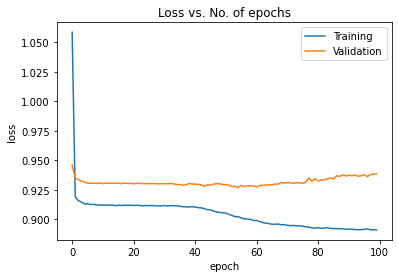

In [102]:
plot_losses(history, name)

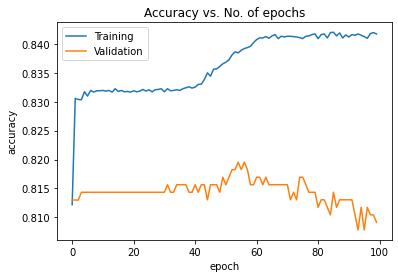

In [103]:
plot_accuracies(history, name)

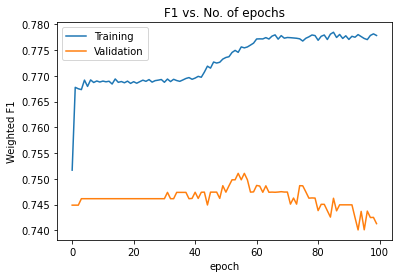

In [104]:
plot_f1(history, name)

In [105]:
train_acc = history[-1]['train_score']*100
val_acc = history[-1]['val_score']*100
test_acc = evaluate(model, test_dl)['val_score']*100
print("Train Accuracy: {:.4f}\nValidation Accuracy: {:.4f}\nTest Accuracy: {:.4f}".format(train_acc, val_acc, test_acc))

Train Accuracy: 84.1723
Validation Accuracy: 80.9140
Test Accuracy: 77.2167


## d) X = 3

In [108]:
df_train = pd.read_csv("MDDA/train_cleaner")
df_train_x3 = pd.read_csv("MDDA/train_cleaner")
for idx, row in df_train_x3.iterrows():
    if idx >= 3:
        df_train_x3.at[idx, 'utterance'] = df_train['utterance'][idx-3] + df_train['utterance'][idx-2] + df_train['utterance'][idx-1]+df_train['utterance'][idx]
df_train_x3.to_csv("MDDA/train_x3_cleaner", index = False)

In [109]:
train = datasets.load_dataset("csv", data_files="MDDA\\train_x3_cleaner")
train = train['train']
train_data = train.map(tokenize, fn_kwargs={'tokenizer': tokenizer})
train_data = train_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
train_data = train_data.with_format(type='torch', columns=['ids', 'act', 'length'])

Using custom data configuration default-db2392794b875057


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\Devansh\.cache\huggingface\datasets\csv\default-db2392794b875057\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4326 [00:00<?, ?ex/s]

  0%|          | 0/4326 [00:00<?, ?ex/s]

In [110]:
train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, collate_fn=collate, shuffle=True)

In [111]:
dropout_prob = 0.25
name = 'X3_cleaner'
model = LSTM_model(dropout_prob).to(device)
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [1], train_loss: 1.0752, train_score: 0.8067, train_f1: 0.7485, val_loss: 0.9549, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.9228, train_score: 0.8307, train_f1: 0.7679, val_loss: 0.9366, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.9164, train_score: 0.8304, train_f1: 0.7674, val_loss: 0.9347, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.9146, train_score: 0.8311, train_f1: 0.7683, val_loss: 0.9338, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.9142, train_score: 0.8309, train_f1: 0.7678, val_loss: 0.9331, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.9139, train_score: 0.8307, train_f1: 0.7679, val_loss: 0.9326, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.9132, train_score: 0.8313, train_f1: 0.7686, val_loss: 0.9320, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.9130, train_score: 0.8315, train_f1: 0.7685, val_loss: 0.9317, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.9130, train_score: 0.8314, train_f1: 0.7683, val_loss: 0.9315, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.9123, train_score: 0.8319, train_f1: 0.7690, val_loss: 0.9316, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.9127, train_score: 0.8314, train_f1: 0.7684, val_loss: 0.9315, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.9126, train_score: 0.8314, train_f1: 0.7685, val_loss: 0.9314, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.9122, train_score: 0.8318, train_f1: 0.7688, val_loss: 0.9315, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.9125, train_score: 0.8314, train_f1: 0.7683, val_loss: 0.9313, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [15], train_loss: 0.9127, train_score: 0.8312, train_f1: 0.7681, val_loss: 0.9314, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [16], train_loss: 0.9121, train_score: 0.8317, train_f1: 0.7687, val_loss: 0.9314, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [17], train_loss: 0.9120, train_score: 0.8318, train_f1: 0.7689, val_loss: 0.9314, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.9119, train_score: 0.8318, train_f1: 0.7690, val_loss: 0.9313, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.9119, train_score: 0.8318, train_f1: 0.7688, val_loss: 0.9312, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [20], train_loss: 0.9122, train_score: 0.8315, train_f1: 0.7684, val_loss: 0.9313, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [21], train_loss: 0.9122, train_score: 0.8314, train_f1: 0.7682, val_loss: 0.9314, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [22], train_loss: 0.9122, train_score: 0.8314, train_f1: 0.7687, val_loss: 0.9311, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [23], train_loss: 0.9121, train_score: 0.8315, train_f1: 0.7684, val_loss: 0.9313, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [24], train_loss: 0.9122, train_score: 0.8314, train_f1: 0.7685, val_loss: 0.9312, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [25], train_loss: 0.9120, train_score: 0.8315, train_f1: 0.7687, val_loss: 0.9312, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [26], train_loss: 0.9117, train_score: 0.8318, train_f1: 0.7690, val_loss: 0.9310, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [27], train_loss: 0.9117, train_score: 0.8318, train_f1: 0.7687, val_loss: 0.9311, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [28], train_loss: 0.9118, train_score: 0.8317, train_f1: 0.7688, val_loss: 0.9312, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [29], train_loss: 0.9117, train_score: 0.8318, train_f1: 0.7687, val_loss: 0.9307, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [30], train_loss: 0.9120, train_score: 0.8314, train_f1: 0.7683, val_loss: 0.9311, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [31], train_loss: 0.9117, train_score: 0.8316, train_f1: 0.7685, val_loss: 0.9309, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [32], train_loss: 0.9117, train_score: 0.8315, train_f1: 0.7684, val_loss: 0.9311, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [33], train_loss: 0.9113, train_score: 0.8317, train_f1: 0.7684, val_loss: 0.9311, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [34], train_loss: 0.9113, train_score: 0.8317, train_f1: 0.7687, val_loss: 0.9305, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [35], train_loss: 0.9109, train_score: 0.8318, train_f1: 0.7684, val_loss: 0.9301, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [36], train_loss: 0.9103, train_score: 0.8319, train_f1: 0.7693, val_loss: 0.9300, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [37], train_loss: 0.9101, train_score: 0.8323, train_f1: 0.7693, val_loss: 0.9306, val_score: 0.8143, val_f1: 0.7460


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [38], train_loss: 0.9097, train_score: 0.8321, train_f1: 0.7690, val_loss: 0.9311, val_score: 0.8143, val_f1: 0.7460


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [39], train_loss: 0.9094, train_score: 0.8324, train_f1: 0.7692, val_loss: 0.9289, val_score: 0.8143, val_f1: 0.7460


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [40], train_loss: 0.9080, train_score: 0.8328, train_f1: 0.7696, val_loss: 0.9296, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [41], train_loss: 0.9069, train_score: 0.8325, train_f1: 0.7692, val_loss: 0.9370, val_score: 0.8117, val_f1: 0.7433


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [42], train_loss: 0.9060, train_score: 0.8333, train_f1: 0.7700, val_loss: 0.9312, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [43], train_loss: 0.9049, train_score: 0.8343, train_f1: 0.7709, val_loss: 0.9327, val_score: 0.8143, val_f1: 0.7460


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [44], train_loss: 0.9037, train_score: 0.8353, train_f1: 0.7720, val_loss: 0.9336, val_score: 0.8143, val_f1: 0.7462


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [45], train_loss: 0.9016, train_score: 0.8366, train_f1: 0.7731, val_loss: 0.9376, val_score: 0.8117, val_f1: 0.7439


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [46], train_loss: 0.9007, train_score: 0.8372, train_f1: 0.7734, val_loss: 0.9369, val_score: 0.8117, val_f1: 0.7438


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [47], train_loss: 0.8995, train_score: 0.8375, train_f1: 0.7741, val_loss: 0.9379, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [48], train_loss: 0.8990, train_score: 0.8380, train_f1: 0.7748, val_loss: 0.9357, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [49], train_loss: 0.8989, train_score: 0.8374, train_f1: 0.7737, val_loss: 0.9376, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [50], train_loss: 0.8984, train_score: 0.8376, train_f1: 0.7742, val_loss: 0.9364, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [51], train_loss: 0.8980, train_score: 0.8378, train_f1: 0.7741, val_loss: 0.9352, val_score: 0.8078, val_f1: 0.7400


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [52], train_loss: 0.8978, train_score: 0.8381, train_f1: 0.7746, val_loss: 0.9383, val_score: 0.8065, val_f1: 0.7388


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [53], train_loss: 0.8960, train_score: 0.8394, train_f1: 0.7768, val_loss: 0.9421, val_score: 0.8051, val_f1: 0.7374


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [54], train_loss: 0.8957, train_score: 0.8387, train_f1: 0.7757, val_loss: 0.9396, val_score: 0.8078, val_f1: 0.7400


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [55], train_loss: 0.8959, train_score: 0.8390, train_f1: 0.7763, val_loss: 0.9368, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [56], train_loss: 0.8953, train_score: 0.8395, train_f1: 0.7770, val_loss: 0.9391, val_score: 0.8065, val_f1: 0.7386


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [57], train_loss: 0.8949, train_score: 0.8403, train_f1: 0.7787, val_loss: 0.9398, val_score: 0.8051, val_f1: 0.7375


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [58], train_loss: 0.8943, train_score: 0.8413, train_f1: 0.7808, val_loss: 0.9409, val_score: 0.8038, val_f1: 0.7367


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [59], train_loss: 0.8947, train_score: 0.8417, train_f1: 0.7826, val_loss: 0.9355, val_score: 0.8104, val_f1: 0.7430


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [60], train_loss: 0.8941, train_score: 0.8427, train_f1: 0.7842, val_loss: 0.9402, val_score: 0.8065, val_f1: 0.7404


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [61], train_loss: 0.8940, train_score: 0.8429, train_f1: 0.7856, val_loss: 0.9395, val_score: 0.8104, val_f1: 0.7468


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [62], train_loss: 0.8925, train_score: 0.8524, train_f1: 0.8037, val_loss: 0.9414, val_score: 0.8039, val_f1: 0.7520


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [63], train_loss: 0.8860, train_score: 0.8586, train_f1: 0.8164, val_loss: 0.9473, val_score: 0.7999, val_f1: 0.7597


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [64], train_loss: 0.8812, train_score: 0.8623, train_f1: 0.8218, val_loss: 0.9519, val_score: 0.7895, val_f1: 0.7559


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [65], train_loss: 0.8792, train_score: 0.8657, train_f1: 0.8293, val_loss: 0.9478, val_score: 0.7934, val_f1: 0.7539


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [66], train_loss: 0.8754, train_score: 0.8691, train_f1: 0.8343, val_loss: 0.9452, val_score: 0.7935, val_f1: 0.7512


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [67], train_loss: 0.8714, train_score: 0.8734, train_f1: 0.8421, val_loss: 0.9545, val_score: 0.7895, val_f1: 0.7570


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [68], train_loss: 0.8664, train_score: 0.8776, train_f1: 0.8482, val_loss: 0.9461, val_score: 0.7920, val_f1: 0.7569


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [69], train_loss: 0.8629, train_score: 0.8819, train_f1: 0.8561, val_loss: 0.9509, val_score: 0.7921, val_f1: 0.7626


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [70], train_loss: 0.8586, train_score: 0.8858, train_f1: 0.8624, val_loss: 0.9550, val_score: 0.7830, val_f1: 0.7567


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [71], train_loss: 0.8541, train_score: 0.8902, train_f1: 0.8693, val_loss: 0.9573, val_score: 0.7816, val_f1: 0.7558


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [72], train_loss: 0.8526, train_score: 0.8907, train_f1: 0.8699, val_loss: 0.9494, val_score: 0.7894, val_f1: 0.7674


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [73], train_loss: 0.8491, train_score: 0.8943, train_f1: 0.8754, val_loss: 0.9573, val_score: 0.7789, val_f1: 0.7573


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [74], train_loss: 0.8475, train_score: 0.8960, train_f1: 0.8778, val_loss: 0.9583, val_score: 0.7750, val_f1: 0.7581


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [75], train_loss: 0.8449, train_score: 0.8983, train_f1: 0.8800, val_loss: 0.9535, val_score: 0.7882, val_f1: 0.7634


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [76], train_loss: 0.8439, train_score: 0.8985, train_f1: 0.8816, val_loss: 0.9561, val_score: 0.7881, val_f1: 0.7685


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [77], train_loss: 0.8417, train_score: 0.9014, train_f1: 0.8861, val_loss: 0.9598, val_score: 0.7828, val_f1: 0.7715


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [78], train_loss: 0.8401, train_score: 0.9021, train_f1: 0.8864, val_loss: 0.9632, val_score: 0.7776, val_f1: 0.7669


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [79], train_loss: 0.8392, train_score: 0.9037, train_f1: 0.8884, val_loss: 0.9535, val_score: 0.7868, val_f1: 0.7666


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [80], train_loss: 0.8381, train_score: 0.9046, train_f1: 0.8898, val_loss: 0.9581, val_score: 0.7815, val_f1: 0.7688


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [81], train_loss: 0.8369, train_score: 0.9053, train_f1: 0.8906, val_loss: 0.9545, val_score: 0.7921, val_f1: 0.7732


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [82], train_loss: 0.8354, train_score: 0.9058, train_f1: 0.8917, val_loss: 0.9612, val_score: 0.7829, val_f1: 0.7687


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [83], train_loss: 0.8336, train_score: 0.9073, train_f1: 0.8925, val_loss: 0.9652, val_score: 0.7764, val_f1: 0.7667


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [84], train_loss: 0.8315, train_score: 0.9096, train_f1: 0.8965, val_loss: 0.9623, val_score: 0.7790, val_f1: 0.7688


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [85], train_loss: 0.8302, train_score: 0.9093, train_f1: 0.8959, val_loss: 0.9678, val_score: 0.7724, val_f1: 0.7658


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [86], train_loss: 0.8294, train_score: 0.9100, train_f1: 0.8971, val_loss: 0.9568, val_score: 0.7802, val_f1: 0.7656


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [87], train_loss: 0.8285, train_score: 0.9107, train_f1: 0.8979, val_loss: 0.9663, val_score: 0.7790, val_f1: 0.7669


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [88], train_loss: 0.8272, train_score: 0.9107, train_f1: 0.8980, val_loss: 0.9669, val_score: 0.7699, val_f1: 0.7615


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [89], train_loss: 0.8263, train_score: 0.9106, train_f1: 0.8979, val_loss: 0.9745, val_score: 0.7685, val_f1: 0.7616


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [90], train_loss: 0.8249, train_score: 0.9120, train_f1: 0.9000, val_loss: 0.9662, val_score: 0.7725, val_f1: 0.7591


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [91], train_loss: 0.8227, train_score: 0.9126, train_f1: 0.9005, val_loss: 0.9696, val_score: 0.7711, val_f1: 0.7633


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [92], train_loss: 0.8212, train_score: 0.9141, train_f1: 0.9018, val_loss: 0.9665, val_score: 0.7764, val_f1: 0.7634


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [93], train_loss: 0.8198, train_score: 0.9143, train_f1: 0.9026, val_loss: 0.9739, val_score: 0.7697, val_f1: 0.7657


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [94], train_loss: 0.8188, train_score: 0.9150, train_f1: 0.9037, val_loss: 0.9677, val_score: 0.7777, val_f1: 0.7686


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [95], train_loss: 0.8172, train_score: 0.9172, train_f1: 0.9067, val_loss: 0.9634, val_score: 0.7790, val_f1: 0.7639


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [96], train_loss: 0.8159, train_score: 0.9184, train_f1: 0.9079, val_loss: 0.9711, val_score: 0.7685, val_f1: 0.7615


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [97], train_loss: 0.8149, train_score: 0.9196, train_f1: 0.9093, val_loss: 0.9634, val_score: 0.7816, val_f1: 0.7695


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [98], train_loss: 0.8137, train_score: 0.9221, train_f1: 0.9133, val_loss: 0.9641, val_score: 0.7802, val_f1: 0.7703


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [99], train_loss: 0.8128, train_score: 0.9220, train_f1: 0.9130, val_loss: 0.9616, val_score: 0.7816, val_f1: 0.7746


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [100], train_loss: 0.8124, train_score: 0.9216, train_f1: 0.9125, val_loss: 0.9619, val_score: 0.7843, val_f1: 0.7757


In [112]:
pkl.dump(model, open('models2\\'+name, 'wb'))

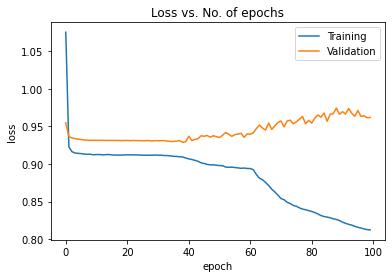

In [113]:
plot_losses(history, name)

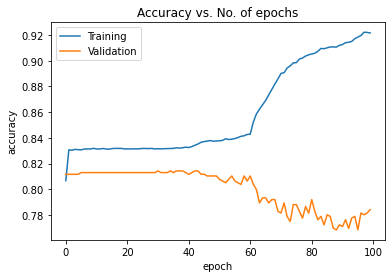

In [114]:
plot_accuracies(history, name)

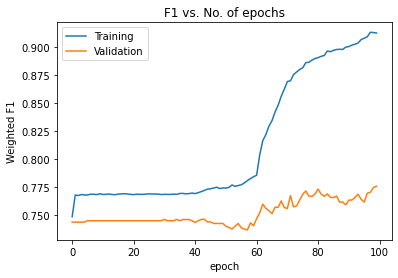

In [115]:
plot_f1(history, name)

In [116]:
train_acc = history[-1]['train_score']*100
val_acc = history[-1]['val_score']*100
test_acc = evaluate(model, test_dl)['val_score']*100
print("Train Accuracy: {:.4f}\nValidation Accuracy: {:.4f}\nTest Accuracy: {:.4f}".format(train_acc, val_acc, test_acc))

Train Accuracy: 92.1573
Validation Accuracy: 78.4274
Test Accuracy: 76.4768


## e) X = 4

In [117]:
df_train = pd.read_csv("MDDA/train_cleaner")
df_train_x4 = pd.read_csv("MDDA/train_cleaner")
for idx, row in df_train_x4.iterrows():
    if idx >= 4:
        df_train_x4.at[idx, 'utterance'] = df_train['utterance'][idx-4] + df_train['utterance'][idx-3] + df_train['utterance'][idx-2] + df_train['utterance'][idx-1]+df_train['utterance'][idx]
df_train_x4.to_csv("MDDA/train_x4_cleaner", index = False)

In [118]:
train = datasets.load_dataset("csv", data_files="MDDA\\train_x4_cleaner")
train = train['train']
train_data = train.map(tokenize, fn_kwargs={'tokenizer': tokenizer})
train_data = train_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
train_data = train_data.with_format(type='torch', columns=['ids', 'act', 'length'])

Using custom data configuration default-134d5555d28c858f


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\Devansh\.cache\huggingface\datasets\csv\default-134d5555d28c858f\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4326 [00:00<?, ?ex/s]

  0%|          | 0/4326 [00:00<?, ?ex/s]

In [119]:
train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, collate_fn=collate, shuffle=True)

In [120]:
dropout_prob = 0.25
name = 'X4_cleaner'
model = LSTM_model(dropout_prob).to(device)
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [1], train_loss: 1.0672, train_score: 0.8061, train_f1: 0.7467, val_loss: 0.9519, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.9213, train_score: 0.8309, train_f1: 0.7679, val_loss: 0.9367, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.9165, train_score: 0.8304, train_f1: 0.7673, val_loss: 0.9349, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.9150, train_score: 0.8307, train_f1: 0.7679, val_loss: 0.9340, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.9148, train_score: 0.8304, train_f1: 0.7673, val_loss: 0.9334, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.9141, train_score: 0.8306, train_f1: 0.7675, val_loss: 0.9327, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.9135, train_score: 0.8310, train_f1: 0.7680, val_loss: 0.9323, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.9132, train_score: 0.8311, train_f1: 0.7682, val_loss: 0.9317, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.9129, train_score: 0.8312, train_f1: 0.7683, val_loss: 0.9293, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.9124, train_score: 0.8319, train_f1: 0.7686, val_loss: 0.9310, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.9126, train_score: 0.8315, train_f1: 0.7684, val_loss: 0.9309, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.9125, train_score: 0.8315, train_f1: 0.7684, val_loss: 0.9309, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.9120, train_score: 0.8320, train_f1: 0.7690, val_loss: 0.9311, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.9116, train_score: 0.8323, train_f1: 0.7695, val_loss: 0.9309, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [15], train_loss: 0.9120, train_score: 0.8318, train_f1: 0.7687, val_loss: 0.9313, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [16], train_loss: 0.9118, train_score: 0.8319, train_f1: 0.7689, val_loss: 0.9309, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [17], train_loss: 0.9117, train_score: 0.8320, train_f1: 0.7687, val_loss: 0.9307, val_score: 0.8117, val_f1: 0.7437


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.9117, train_score: 0.8320, train_f1: 0.7692, val_loss: 0.9315, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.9120, train_score: 0.8317, train_f1: 0.7685, val_loss: 0.9298, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [20], train_loss: 0.9115, train_score: 0.8321, train_f1: 0.7693, val_loss: 0.9311, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [21], train_loss: 0.9114, train_score: 0.8321, train_f1: 0.7694, val_loss: 0.9299, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [22], train_loss: 0.9117, train_score: 0.8319, train_f1: 0.7688, val_loss: 0.9315, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [23], train_loss: 0.9115, train_score: 0.8320, train_f1: 0.7693, val_loss: 0.9282, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [24], train_loss: 0.9107, train_score: 0.8328, train_f1: 0.7698, val_loss: 0.9309, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [25], train_loss: 0.9102, train_score: 0.8333, train_f1: 0.7702, val_loss: 0.9302, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [26], train_loss: 0.9097, train_score: 0.8337, train_f1: 0.7709, val_loss: 0.9306, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [27], train_loss: 0.9083, train_score: 0.8349, train_f1: 0.7715, val_loss: 0.9304, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [28], train_loss: 0.9072, train_score: 0.8358, train_f1: 0.7727, val_loss: 0.9316, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [29], train_loss: 0.9061, train_score: 0.8367, train_f1: 0.7732, val_loss: 0.9314, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [30], train_loss: 0.9049, train_score: 0.8370, train_f1: 0.7733, val_loss: 0.9301, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [31], train_loss: 0.9030, train_score: 0.8388, train_f1: 0.7750, val_loss: 0.9311, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [32], train_loss: 0.9012, train_score: 0.8399, train_f1: 0.7762, val_loss: 0.9310, val_score: 0.8130, val_f1: 0.7448


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [33], train_loss: 0.9003, train_score: 0.8397, train_f1: 0.7759, val_loss: 0.9298, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [34], train_loss: 0.9001, train_score: 0.8409, train_f1: 0.7772, val_loss: 0.9303, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [35], train_loss: 0.8993, train_score: 0.8409, train_f1: 0.7773, val_loss: 0.9326, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [36], train_loss: 0.8984, train_score: 0.8414, train_f1: 0.7774, val_loss: 0.9349, val_score: 0.8091, val_f1: 0.7412


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [37], train_loss: 0.8975, train_score: 0.8417, train_f1: 0.7782, val_loss: 0.9324, val_score: 0.8117, val_f1: 0.7437


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [38], train_loss: 0.8971, train_score: 0.8415, train_f1: 0.7776, val_loss: 0.9324, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [39], train_loss: 0.8965, train_score: 0.8417, train_f1: 0.7777, val_loss: 0.9326, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [40], train_loss: 0.8962, train_score: 0.8419, train_f1: 0.7781, val_loss: 0.9329, val_score: 0.8091, val_f1: 0.7411


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [41], train_loss: 0.8964, train_score: 0.8415, train_f1: 0.7777, val_loss: 0.9351, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [42], train_loss: 0.8957, train_score: 0.8422, train_f1: 0.7788, val_loss: 0.9342, val_score: 0.8117, val_f1: 0.7436


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [43], train_loss: 0.8951, train_score: 0.8423, train_f1: 0.7783, val_loss: 0.9336, val_score: 0.8104, val_f1: 0.7423


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [44], train_loss: 0.8950, train_score: 0.8425, train_f1: 0.7786, val_loss: 0.9321, val_score: 0.8130, val_f1: 0.7448


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [45], train_loss: 0.8945, train_score: 0.8428, train_f1: 0.7789, val_loss: 0.9310, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [46], train_loss: 0.8947, train_score: 0.8427, train_f1: 0.7786, val_loss: 0.9322, val_score: 0.8130, val_f1: 0.7448


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [47], train_loss: 0.8942, train_score: 0.8431, train_f1: 0.7793, val_loss: 0.9316, val_score: 0.8130, val_f1: 0.7448


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [48], train_loss: 0.8945, train_score: 0.8426, train_f1: 0.7785, val_loss: 0.9317, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [49], train_loss: 0.8940, train_score: 0.8430, train_f1: 0.7792, val_loss: 0.9321, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [50], train_loss: 0.8943, train_score: 0.8428, train_f1: 0.7789, val_loss: 0.9324, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [51], train_loss: 0.8940, train_score: 0.8430, train_f1: 0.7791, val_loss: 0.9331, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [52], train_loss: 0.8939, train_score: 0.8429, train_f1: 0.7788, val_loss: 0.9332, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [53], train_loss: 0.8940, train_score: 0.8428, train_f1: 0.7785, val_loss: 0.9331, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [54], train_loss: 0.8944, train_score: 0.8423, train_f1: 0.7781, val_loss: 0.9333, val_score: 0.8143, val_f1: 0.7460


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [55], train_loss: 0.8938, train_score: 0.8429, train_f1: 0.7792, val_loss: 0.9330, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [56], train_loss: 0.8938, train_score: 0.8430, train_f1: 0.7790, val_loss: 0.9331, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [57], train_loss: 0.8942, train_score: 0.8425, train_f1: 0.7785, val_loss: 0.9330, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [58], train_loss: 0.8940, train_score: 0.8428, train_f1: 0.7790, val_loss: 0.9331, val_score: 0.8143, val_f1: 0.7460


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [59], train_loss: 0.8938, train_score: 0.8429, train_f1: 0.7791, val_loss: 0.9332, val_score: 0.8143, val_f1: 0.7460


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [60], train_loss: 0.8938, train_score: 0.8430, train_f1: 0.7791, val_loss: 0.9330, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [61], train_loss: 0.8940, train_score: 0.8428, train_f1: 0.7787, val_loss: 0.9328, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [62], train_loss: 0.8940, train_score: 0.8427, train_f1: 0.7786, val_loss: 0.9325, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [63], train_loss: 0.8939, train_score: 0.8429, train_f1: 0.7788, val_loss: 0.9320, val_score: 0.8130, val_f1: 0.7448


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [64], train_loss: 0.8940, train_score: 0.8429, train_f1: 0.7788, val_loss: 0.9318, val_score: 0.8130, val_f1: 0.7449


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [65], train_loss: 0.8941, train_score: 0.8432, train_f1: 0.7793, val_loss: 0.9375, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [66], train_loss: 0.8939, train_score: 0.8429, train_f1: 0.7789, val_loss: 0.9388, val_score: 0.8144, val_f1: 0.7462


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [67], train_loss: 0.8938, train_score: 0.8432, train_f1: 0.7791, val_loss: 0.9379, val_score: 0.8091, val_f1: 0.7414


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [68], train_loss: 0.8933, train_score: 0.8433, train_f1: 0.7794, val_loss: 0.9375, val_score: 0.8078, val_f1: 0.7401


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [69], train_loss: 0.8930, train_score: 0.8439, train_f1: 0.7803, val_loss: 0.9379, val_score: 0.8078, val_f1: 0.7401


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [70], train_loss: 0.8933, train_score: 0.8436, train_f1: 0.7796, val_loss: 0.9335, val_score: 0.8143, val_f1: 0.7461


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [71], train_loss: 0.8925, train_score: 0.8438, train_f1: 0.7800, val_loss: 0.9352, val_score: 0.8065, val_f1: 0.7386


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [72], train_loss: 0.8931, train_score: 0.8435, train_f1: 0.7794, val_loss: 0.9353, val_score: 0.8078, val_f1: 0.7400


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [73], train_loss: 0.8928, train_score: 0.8437, train_f1: 0.7797, val_loss: 0.9355, val_score: 0.8065, val_f1: 0.7387


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [74], train_loss: 0.8927, train_score: 0.8437, train_f1: 0.7797, val_loss: 0.9353, val_score: 0.8091, val_f1: 0.7412


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [75], train_loss: 0.8926, train_score: 0.8440, train_f1: 0.7802, val_loss: 0.9357, val_score: 0.8078, val_f1: 0.7400


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [76], train_loss: 0.8931, train_score: 0.8434, train_f1: 0.7795, val_loss: 0.9350, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [77], train_loss: 0.8922, train_score: 0.8441, train_f1: 0.7803, val_loss: 0.9348, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [78], train_loss: 0.8926, train_score: 0.8437, train_f1: 0.7799, val_loss: 0.9350, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [79], train_loss: 0.8927, train_score: 0.8438, train_f1: 0.7800, val_loss: 0.9350, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [80], train_loss: 0.8925, train_score: 0.8437, train_f1: 0.7797, val_loss: 0.9357, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [81], train_loss: 0.8924, train_score: 0.8437, train_f1: 0.7796, val_loss: 0.9354, val_score: 0.8091, val_f1: 0.7414


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [82], train_loss: 0.8918, train_score: 0.8443, train_f1: 0.7809, val_loss: 0.9369, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [83], train_loss: 0.8920, train_score: 0.8443, train_f1: 0.7808, val_loss: 0.9365, val_score: 0.8091, val_f1: 0.7412


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [84], train_loss: 0.8919, train_score: 0.8439, train_f1: 0.7802, val_loss: 0.9363, val_score: 0.8117, val_f1: 0.7438


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [85], train_loss: 0.8916, train_score: 0.8442, train_f1: 0.7806, val_loss: 0.9394, val_score: 0.8091, val_f1: 0.7413


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [86], train_loss: 0.8917, train_score: 0.8437, train_f1: 0.7802, val_loss: 0.9393, val_score: 0.8117, val_f1: 0.7438


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [87], train_loss: 0.8913, train_score: 0.8439, train_f1: 0.7802, val_loss: 0.9419, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [88], train_loss: 0.8910, train_score: 0.8440, train_f1: 0.7805, val_loss: 0.9421, val_score: 0.8091, val_f1: 0.7412


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [89], train_loss: 0.8906, train_score: 0.8449, train_f1: 0.7824, val_loss: 0.9393, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [90], train_loss: 0.8905, train_score: 0.8438, train_f1: 0.7800, val_loss: 0.9411, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [91], train_loss: 0.8900, train_score: 0.8440, train_f1: 0.7803, val_loss: 0.9427, val_score: 0.8104, val_f1: 0.7425


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [92], train_loss: 0.8895, train_score: 0.8441, train_f1: 0.7808, val_loss: 0.9413, val_score: 0.8117, val_f1: 0.7437


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [93], train_loss: 0.8894, train_score: 0.8442, train_f1: 0.7810, val_loss: 0.9411, val_score: 0.8117, val_f1: 0.7437


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [94], train_loss: 0.8886, train_score: 0.8456, train_f1: 0.7843, val_loss: 0.9412, val_score: 0.8104, val_f1: 0.7424


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [95], train_loss: 0.8889, train_score: 0.8452, train_f1: 0.7839, val_loss: 0.9423, val_score: 0.8117, val_f1: 0.7438


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [96], train_loss: 0.8886, train_score: 0.8455, train_f1: 0.7841, val_loss: 0.9404, val_score: 0.8078, val_f1: 0.7399


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [97], train_loss: 0.8884, train_score: 0.8461, train_f1: 0.7853, val_loss: 0.9368, val_score: 0.8143, val_f1: 0.7462


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [98], train_loss: 0.8881, train_score: 0.8484, train_f1: 0.7906, val_loss: 0.9364, val_score: 0.8157, val_f1: 0.7475


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [99], train_loss: 0.8873, train_score: 0.8483, train_f1: 0.7904, val_loss: 0.9333, val_score: 0.8157, val_f1: 0.7474


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch [100], train_loss: 0.8873, train_score: 0.8484, train_f1: 0.7900, val_loss: 0.9345, val_score: 0.8143, val_f1: 0.7462


In [121]:
pkl.dump(model, open('models2\\'+name, 'wb'))

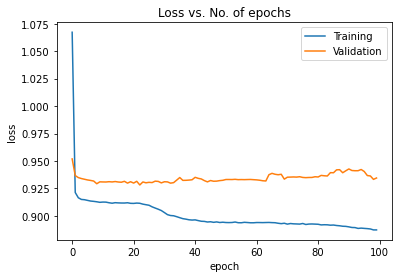

In [122]:
plot_losses(history, name)

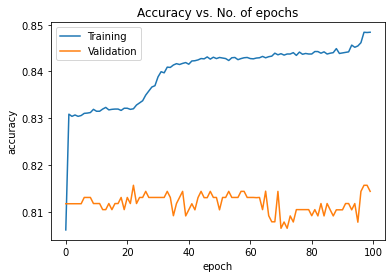

In [123]:
plot_accuracies(history, name)

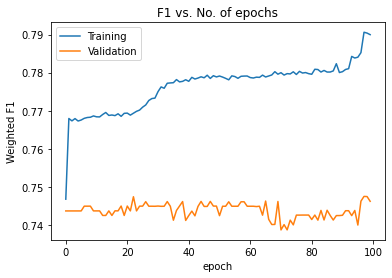

In [124]:
plot_f1(history, name)

In [125]:
train_acc = history[-1]['train_score']*100
val_acc = history[-1]['val_score']*100
test_acc = evaluate(model, test_dl)['val_score']*100
print("Train Accuracy: {:.4f}\nValidation Accuracy: {:.4f}\nTest Accuracy: {:.4f}".format(train_acc, val_acc, test_acc))

Train Accuracy: 84.8386
Validation Accuracy: 81.4348
Test Accuracy: 77.5502


# Load model

In [128]:
filename = 'models2/X0_cleaner_P0.25'
loaded_model = pkl.load(open(filename, 'rb'))

In [129]:
train = datasets.load_dataset("csv", data_files="MDDA\\train_cleaner")
train = train['train']
train_data = train.map(tokenize, fn_kwargs={'tokenizer': tokenizer})
train_data = train_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
train_data = train_data.with_format(type='torch', columns=['ids', 'act', 'length'])

Using custom data configuration default-c0f1fa5989e4ad40
Reusing dataset csv (C:\Users\Devansh\.cache\huggingface\datasets\csv\default-c0f1fa5989e4ad40\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Devansh\.cache\huggingface\datasets\csv\default-c0f1fa5989e4ad40\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-4370a8bb7c05669a.arrow
Loading cached processed dataset at C:\Users\Devansh\.cache\huggingface\datasets\csv\default-c0f1fa5989e4ad40\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-a4124bfb9b92d28f.arrow


In [130]:
train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, collate_fn=collate, shuffle=True)

In [132]:
test_acc = evaluate(loaded_model, test_dl)['val_score']*100
test_acc

C:\Users\Devansh\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:764: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:926.)
  result = _VF.lstm(input, batch_sizes, hx, self._flat_weights, self.bias,
C:\Users\Devansh\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:764: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:926.)
  result = _VF.lstm(input, batch_sizes, hx, self._flat_weights, self.bias,
C:\Users\Devansh\anaconda3\lib\site-packages

83.38414629300436